In [ ]:
! pip install lifelines

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4138 sha256=dd304da2debc1767a1c7b428857412fe89b3c42e190b9bdfb025531e85a14d44
  Stored in directory: c:\users\romina\appdata\local\pip\cache\wheels\50\37\21\0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter


In [2]:
file_path = "8_Olink_Data_NPX_LOD_1710.txt"

In [5]:
base_cols = ["EID", "Year_of_birth", "Age_at_recruitment"]

In [6]:
diagnosis_cols = [f"Diagnoses_ICD10_{i}" for i in range (1, 259)]
diagnosis_cols.insert(0, "Diagnoses_ICD10")


In [7]:
date_cols = [f"Date_of_first_in-patient_diagnosis_ICD10_{i}" for i in range(1, 259)]
date_cols.insert(0, "Date_of_first_in-patient_diagnosis_ICD10")

In [11]:
use_cols = base_cols + diagnosis_cols + date_cols

In [16]:
df_peek = pd.read_csv(file_path, nrows=0)
print(df_peek.columns.tolist())

['EID\tSex\tYear_of_birth\tMonth_of_birth\tEthnic_background\tAge_when_attended_assessment_centre\tAge_when_attended_assessment_centre_1\tPlate\tAge_when_attended_assessment_centre_2\tAge_when_attended_assessment_centre_3\tAge_at_recruitment\tTotal_volume_of_peri-ventricular_white_matter_hyperintensities\tTotal_volume_of_deep_white_matter_hyperintensities\tVolume_of_thalamus_(left)\tVolume_of_thalamus_(right)\tVolume_of_caudate_(left)\tVolume_of_caudate_(right)\tVolume_of_putamen_(left)\tVolume_of_putamen_(right)\tVolume_of_pallidum_(left)\tVolume_of_pallidum_(right)\tVolume_of_hippocampus_(left)\tVolume_of_hippocampus_(right)\tVolume_of_amygdala_(left)\tVolume_of_amygdala_(right)\tVolume_of_accumbens_(left)\tVolume_of_accumbens_(right)\tTotal_volume_of_white_matter_hyperintensities_(from_T1_and_T2_FLAIR_images)\tVolume_of_EstimatedTotalIntraCranial_(whole_brain)\tAlbumin\tCreatinine\tC-reactive_protein\tTotal_protein\tNumber_of_proteins_measured\tNumber_of_proteins_measured_2\tNumber_

In [17]:
df = pd.read_csv(file_path, sep='\t', usecols=use_cols)


C:\Users\Romina\AppData\Local\Temp\ipykernel_40084\662675637.py:1: DtypeWarning: Columns (409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,78

In [18]:
df

,EID,Year_of_birth,Age_at_recruitment,Diagnoses_ICD10,Diagnoses_ICD10_1,Diagnoses_ICD10_2,Diagnoses_ICD10_3,Diagnoses_ICD10_4,Diagnoses_ICD10_5,Diagnoses_ICD10_6,...,Date_of_first_in-patient_diagnosis_ICD10_249,Date_of_first_in-patient_diagnosis_ICD10_250,Date_of_first_in-patient_diagnosis_ICD10_251,Date_of_first_in-patient_diagnosis_ICD10_252,Date_of_first_in-patient_diagnosis_ICD10_253,Date_of_first_in-patient_diagnosis_ICD10_254,Date_of_first_in-patient_diagnosis_ICD10_255,Date_of_first_in-patient_diagnosis_ICD10_256,Date_of_first_in-patient_diagnosis_ICD10_257,Date_of_first_in-patient_diagnosis_ICD10_258
0,1000024,1940,67,F009,F019,F03,G309,I10,I120,I48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000043,1945,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000156,1944,62,E039,E079,E871,H258,H269,H522,I10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000217,1945,63,B24,C060,I269,R509,R69,Z21,Z514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000309,1948,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52695,6023140,1953,55,F419,H264,H269,H521,I259,I319,I350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52696,6023206,1945,64,C447,D509,E831,G562,I10,I251,I340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52697,6023457,1960,48,D125,D128,E86,I841,I848,K566,K573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52698,6023548,1945,62,C155,C159,C160,C675,C679,C780,C786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
diagnosis_cols = [col for col in df.columns if col.startswith("Diagnoses_ICD10_")]
date_cols = [col for col in df.columns if col.startswith("Date_of_first_in-patient_diagnosis_ICD10_")]


In [20]:
df_diag_long = df.melt(id_vars=["EID", "Year_of_birth", "Age_at_recruitment"],
                       value_vars=diagnosis_cols,
                       var_name="diagnosis_col",
                       value_name="ICD10_code")

In [21]:
df_date_long = df.melt(id_vars=["EID"],
                       value_vars=date_cols,
                       var_name="date_col",
                       value_name="diagnosis_date")

In [22]:
df_diag_long["diag_num"] = df_diag_long["diagnosis_col"].str.extract(r"(\d+)$")
df_date_long["diag_num"] = df_date_long["date_col"].str.extract(r"(\d+)$")

In [23]:
df_long = pd.merge(df_diag_long, df_date_long, on=["EID", "diag_num"], how="inner")

In [24]:
df_long

,EID,Year_of_birth,Age_at_recruitment,diagnosis_col,ICD10_code,diag_num,date_col,diagnosis_date
0,1000024,1940,67,Diagnoses_ICD10_1,F019,1,Date_of_first_in-patient_diagnosis_ICD10_1,2011-05-28
1,1000043,1945,65,Diagnoses_ICD10_1,NaN,1,Date_of_first_in-patient_diagnosis_ICD10_1,NaN
2,1000156,1944,62,Diagnoses_ICD10_1,E079,1,Date_of_first_in-patient_diagnosis_ICD10_1,2021-03-15
3,1000217,1945,63,Diagnoses_ICD10_1,C060,1,Date_of_first_in-patient_diagnosis_ICD10_1,2010-05-30
4,1000309,1948,60,Diagnoses_ICD10_1,NaN,1,Date_of_first_in-patient_diagnosis_ICD10_1,NaN
...,...,...,...,...,...,...,...,...
13596595,6023140,1953,55,Diagnoses_ICD10_258,NaN,258,Date_of_first_in-patient_diagnosis_ICD10_258,NaN
13596596,6023206,1945,64,Diagnoses_ICD10_258,NaN,258,Date_of_first_in-patient_diagnosis_ICD10_258,NaN
13596597,6023457,1960,48,Diagnoses_ICD10_258,NaN,258,Date_of_first_in-patient_diagnosis_ICD10_258,NaN
13596598,6023548,1945,62,Diagnoses_ICD10_258,NaN,258,Date_of_first_in-patient_diagnosis_ICD10_258,NaN


In [ ]:

df_long = df_long.drop(columns=["diagnosis_col", "date_col", "diag_num"])

In [26]:
df_long

,EID,Year_of_birth,Age_at_recruitment,ICD10_code,diagnosis_date
0,1000024,1940,67,F019,2011-05-28
1,1000043,1945,65,NaN,NaN
2,1000156,1944,62,E079,2021-03-15
3,1000217,1945,63,C060,2010-05-30
4,1000309,1948,60,NaN,NaN
...,...,...,...,...,...
13596595,6023140,1953,55,NaN,NaN
13596596,6023206,1945,64,NaN,NaN
13596597,6023457,1960,48,NaN,NaN
13596598,6023548,1945,62,NaN,NaN


In [27]:
df_long = df_long[df_long["ICD10_code"].notna()]

In [28]:
df_long

,EID,Year_of_birth,Age_at_recruitment,ICD10_code,diagnosis_date
0,1000024,1940,67,F019,2011-05-28
2,1000156,1944,62,E079,2021-03-15
3,1000217,1945,63,C060,2010-05-30
5,1000446,1939,69,I10,2017-07-06
6,1000522,1948,60,G473,2020-09-08
...,...,...,...,...,...
10893080,4511214,1957,52,Z931,2018-09-20
10933991,3399413,1957,51,Z960,2011-10-05
10945780,4511214,1957,52,Z944,2006-06-10
10986691,3399413,1957,51,Z991,2020-01-07


In [29]:
icd10_codes_mapping = {
    'alzheimer': ['G300', 'G309', 'G301', 'G310'],
    'dementia': ['F000', 'F001', 'F002', 'F009', 'F010', 'F011', 'F012', 'F013', 'F018', 'F019', 'F020', 'F021', 'F022', 'F023', 'F024', 'F028'],
    'stroke': ['I689', 'I635', 'I633', 'I638', 'I634'],
    'lbd': ['G318'],  
    'ms': ['G35'],  
    'als': ['G122'],  
    'parkinson': ['G20'],
    'delirium': ['F051'],
    'neurocognitive_disorder' : ['F067'], 
    'ns_degeneration' : ['G319', 'G328']
}

In [30]:
code_to_disease = {code: disease for disease, codes in icd10_codes_mapping.items() for code in codes}


In [31]:
df_long['disease_group'] = df_long['ICD10_code'].map(code_to_disease)

C:\Users\Romina\AppData\Local\Temp\ipykernel_40084\1591388902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['disease_group'] = df_long['ICD10_code'].map(code_to_disease)


In [32]:
df_neuro = df_long.dropna(subset=['disease_group']).copy()

In [33]:
df_neuro

,EID,Year_of_birth,Age_at_recruitment,ICD10_code,diagnosis_date,disease_group
0,1000024,1940,67,F019,2011-05-28,dementia
24,1002343,1945,62,G318,2017-06-07,lbd
59,1006011,1941,68,F009,2016-02-07,dementia
181,1017356,1940,68,G122,2022-08-15,als
254,1024241,1961,47,G319,2016-05-03,ns_degeneration
...,...,...,...,...,...,...
2202371,4977683,1955,54,I635,2019-08-23,stroke
2205908,5321647,1947,60,I633,2020-07-01,stroke
2275506,1898971,1952,57,I635,2021-07-16,stroke
2357681,4705211,1942,65,I635,2020-02-19,stroke


In [ ]:
# Convert diagnosis date to datetime
df_neuro['diagnosis_date'] = pd.to_datetime(df_neuro['diagnosis_date'], errors='coerce')

# event time
df_neuro['event_time'] = df_neuro['diagnosis_date'].dt.year - df_neuro['Year_of_birth']

# they had the diagnosis
df_neuro['event_observed'] = 1

In [36]:
# Identify all participants who had any neurodegenerative disease
case_eids = df_neuro['EID'].unique()

# Create a censored group from those NOT in case_eids
df_censored = df[~df['EID'].isin(case_eids)].copy()

# Use age at recruitment as censoring time
df_censored['event_time'] = df_censored['Age_at_recruitment']
df_censored['event_observed'] = 0

# Add a column to keep consistent format
df_censored['disease_group'] = 'none'

In [37]:
# Combine both case and censored data
df_survival = pd.concat([df_neuro[['EID', 'event_time', 'event_observed', 'disease_group']],
                         df_censored[['EID', 'event_time', 'event_observed', 'disease_group']]], ignore_index=True)


In [39]:
df_survival.rename(columns={'EID': 'eid'}, inplace=True)


In [41]:
organ_age_gap = pd.read_csv("organ_age_gaps_final.csv")

In [42]:
organ_age_gap

,eid,Adipose,Artery,Brain,Esophagus,Heart,Immune,Intestine,Kidney,Liver,Lung,Muscle,Pancreas,Skin,Stomach,Whole Blood,Organism_Model,All_Protein_Model
0,1000024,-9.143051,-4.981655,4.178352,-9.890959,-8.563195,-5.443092,-8.612221,-9.819948,-1.406451,-5.941911,-8.168053,-10.739258,-10.451964,-9.208523,-2.822113,1.341191,-2.166030
1,1000043,-8.915050,-5.970129,-2.217399,-7.373668,-10.641514,-4.284931,-1.694348,-8.467853,2.674622,-9.870583,-6.383359,-4.785891,-4.826189,-2.878227,-6.241980,0.000000,0.000000
2,1000156,-2.792091,-8.376524,-2.311218,-4.697093,-1.865260,-7.833528,-9.244810,-5.925379,0.706680,-2.882286,-6.613710,-8.235710,-7.747672,-6.857738,-8.733680,-4.482610,-4.140306
3,1000217,-4.695239,-7.736212,7.083564,-2.617013,-5.827723,-0.710769,5.535481,-4.522908,-0.844049,-3.726159,-4.975404,0.208766,-4.397638,-1.895467,4.569362,5.227259,2.936917
4,1000309,-5.584308,-7.996071,-1.665704,-1.089542,-3.186085,-1.484941,-2.116024,-0.559327,-6.103880,-3.012410,-2.040107,-2.416313,-2.243959,-3.202432,-4.199673,-0.588616,-2.471371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52695,6023140,-1.407284,-2.079217,-0.589227,-1.053575,2.672767,6.959924,7.164214,1.720104,-1.752905,1.877077,-1.825025,-4.189350,-0.442759,-1.733831,-0.992742,-1.620219,-0.269828
52696,6023206,-6.889302,-3.642802,-6.417696,-6.562487,-3.795801,-10.596840,-12.025010,-6.817563,-0.758853,-8.977458,-1.641125,-4.525371,-5.765624,-6.267097,-9.348222,-4.187179,-1.506090
52697,6023457,10.898675,7.599310,5.995820,8.910251,10.538261,10.399887,8.248674,9.821455,6.568791,5.834880,9.446080,10.104164,10.330164,6.659135,9.127780,5.392734,3.593958
52698,6023548,-2.696049,-1.783136,5.340057,-4.836762,-4.468050,-5.824312,2.561149,-4.153556,1.312810,-3.743193,-1.796088,-0.739186,-1.957090,1.442377,-2.383130,2.569806,0.669490


In [43]:
df_merged = df_survival.merge(organ_age_gap, on='eid', how='left')

In [44]:
df_merged

,eid,event_time,event_observed,disease_group,Adipose,Artery,Brain,Esophagus,Heart,Immune,...,Kidney,Liver,Lung,Muscle,Pancreas,Skin,Stomach,Whole Blood,Organism_Model,All_Protein_Model
0,1000024,71,1,dementia,-9.143051,-4.981655,4.178352,-9.890959,-8.563195,-5.443092,...,-9.819948,-1.406451,-5.941911,-8.168053,-10.739258,-10.451964,-9.208523,-2.822113,1.341191,-2.166030
1,1002343,72,1,lbd,-6.642809,-1.698654,-1.594955,-5.383031,-6.896181,-10.954464,...,-4.950498,-12.614187,-5.540639,-5.015614,-7.529888,-1.502454,-6.672107,-11.135122,-6.429847,-2.887275
2,1006011,75,1,dementia,-11.189788,-8.075164,-0.706298,-13.256648,-11.274012,-9.516524,...,-12.180859,-10.963278,-5.331135,-7.906554,-11.135057,-10.539842,-9.400056,-2.011681,2.254781,-0.912293
3,1017356,82,1,als,-11.445370,-8.167886,-4.319158,-6.102664,-10.302805,-8.360835,...,-12.194337,-5.303775,-8.554684,-11.772005,-7.629114,-5.338126,-10.482551,-11.749882,-5.364263,-5.263267
4,1024241,55,1,ns_degeneration,9.718941,8.202293,2.390786,7.631432,8.555370,5.272066,...,9.565817,10.365041,6.767982,12.087483,6.975039,8.326691,8.938711,1.649841,3.055504,1.839978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54368,6023140,55,0,none,-1.407284,-2.079217,-0.589227,-1.053575,2.672767,6.959924,...,1.720104,-1.752905,1.877077,-1.825025,-4.189350,-0.442759,-1.733831,-0.992742,-1.620219,-0.269828
54369,6023206,64,0,none,-6.889302,-3.642802,-6.417696,-6.562487,-3.795801,-10.596840,...,-6.817563,-0.758853,-8.977458,-1.641125,-4.525371,-5.765624,-6.267097,-9.348222,-4.187179,-1.506090
54370,6023457,48,0,none,10.898675,7.599310,5.995820,8.910251,10.538261,10.399887,...,9.821455,6.568791,5.834880,9.446080,10.104164,10.330164,6.659135,9.127780,5.392734,3.593958
54371,6023548,62,0,none,-2.696049,-1.783136,5.340057,-4.836762,-4.468050,-5.824312,...,-4.153556,1.312810,-3.743193,-1.796088,-0.739186,-1.957090,1.442377,-2.383130,2.569806,0.669490


In [48]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_AD = df_merged[df_merged['disease_group'].isin(['alzheimer', 'none'])].copy()


In [49]:

organ_cols = [
    'Adipose', 'Artery', 'Brain', 'Esophagus', 'Heart', 'Immune', 'Kidney',
    'Liver', 'Lung', 'Muscle', 'Pancreas', 'Skin', 'Stomach', 'Whole Blood'
]

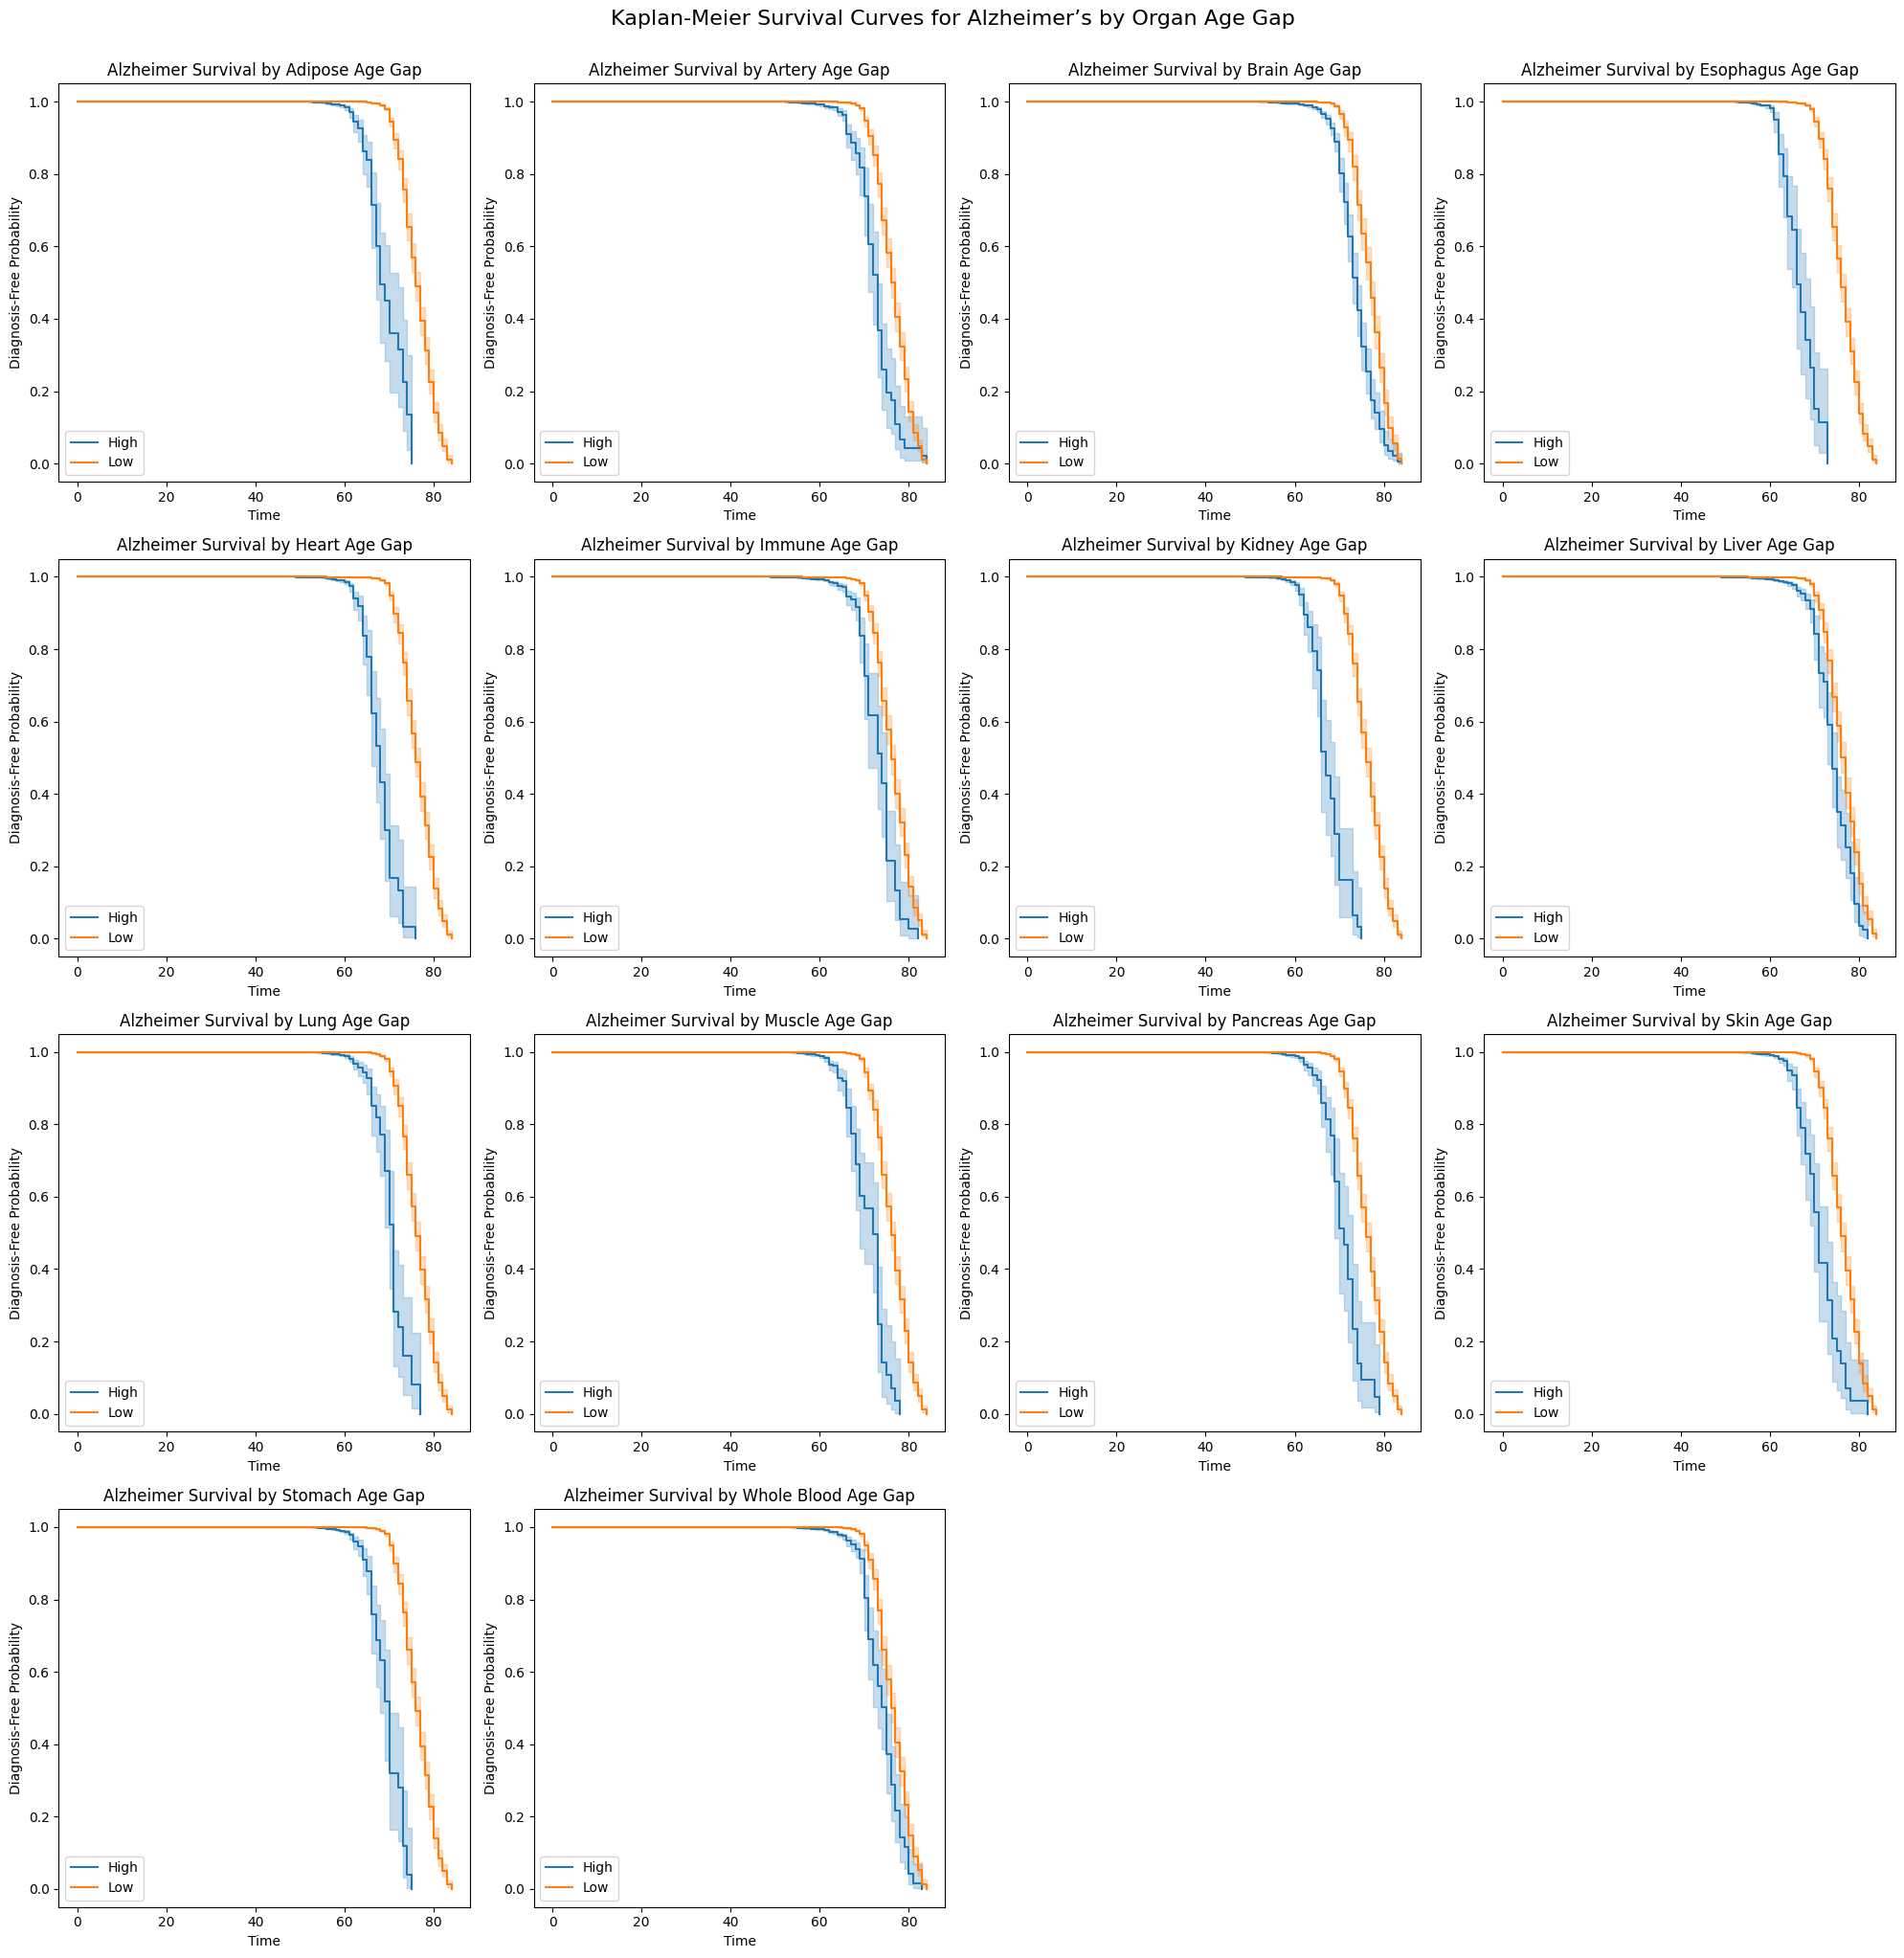

In [58]:

num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_AD[organ].median()
    df_AD['organ_group'] = df_AD[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_AD['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_AD[mask]['event_time'], df_AD[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'Alzheimer Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for Alzheimer’s by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("alzheimers_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

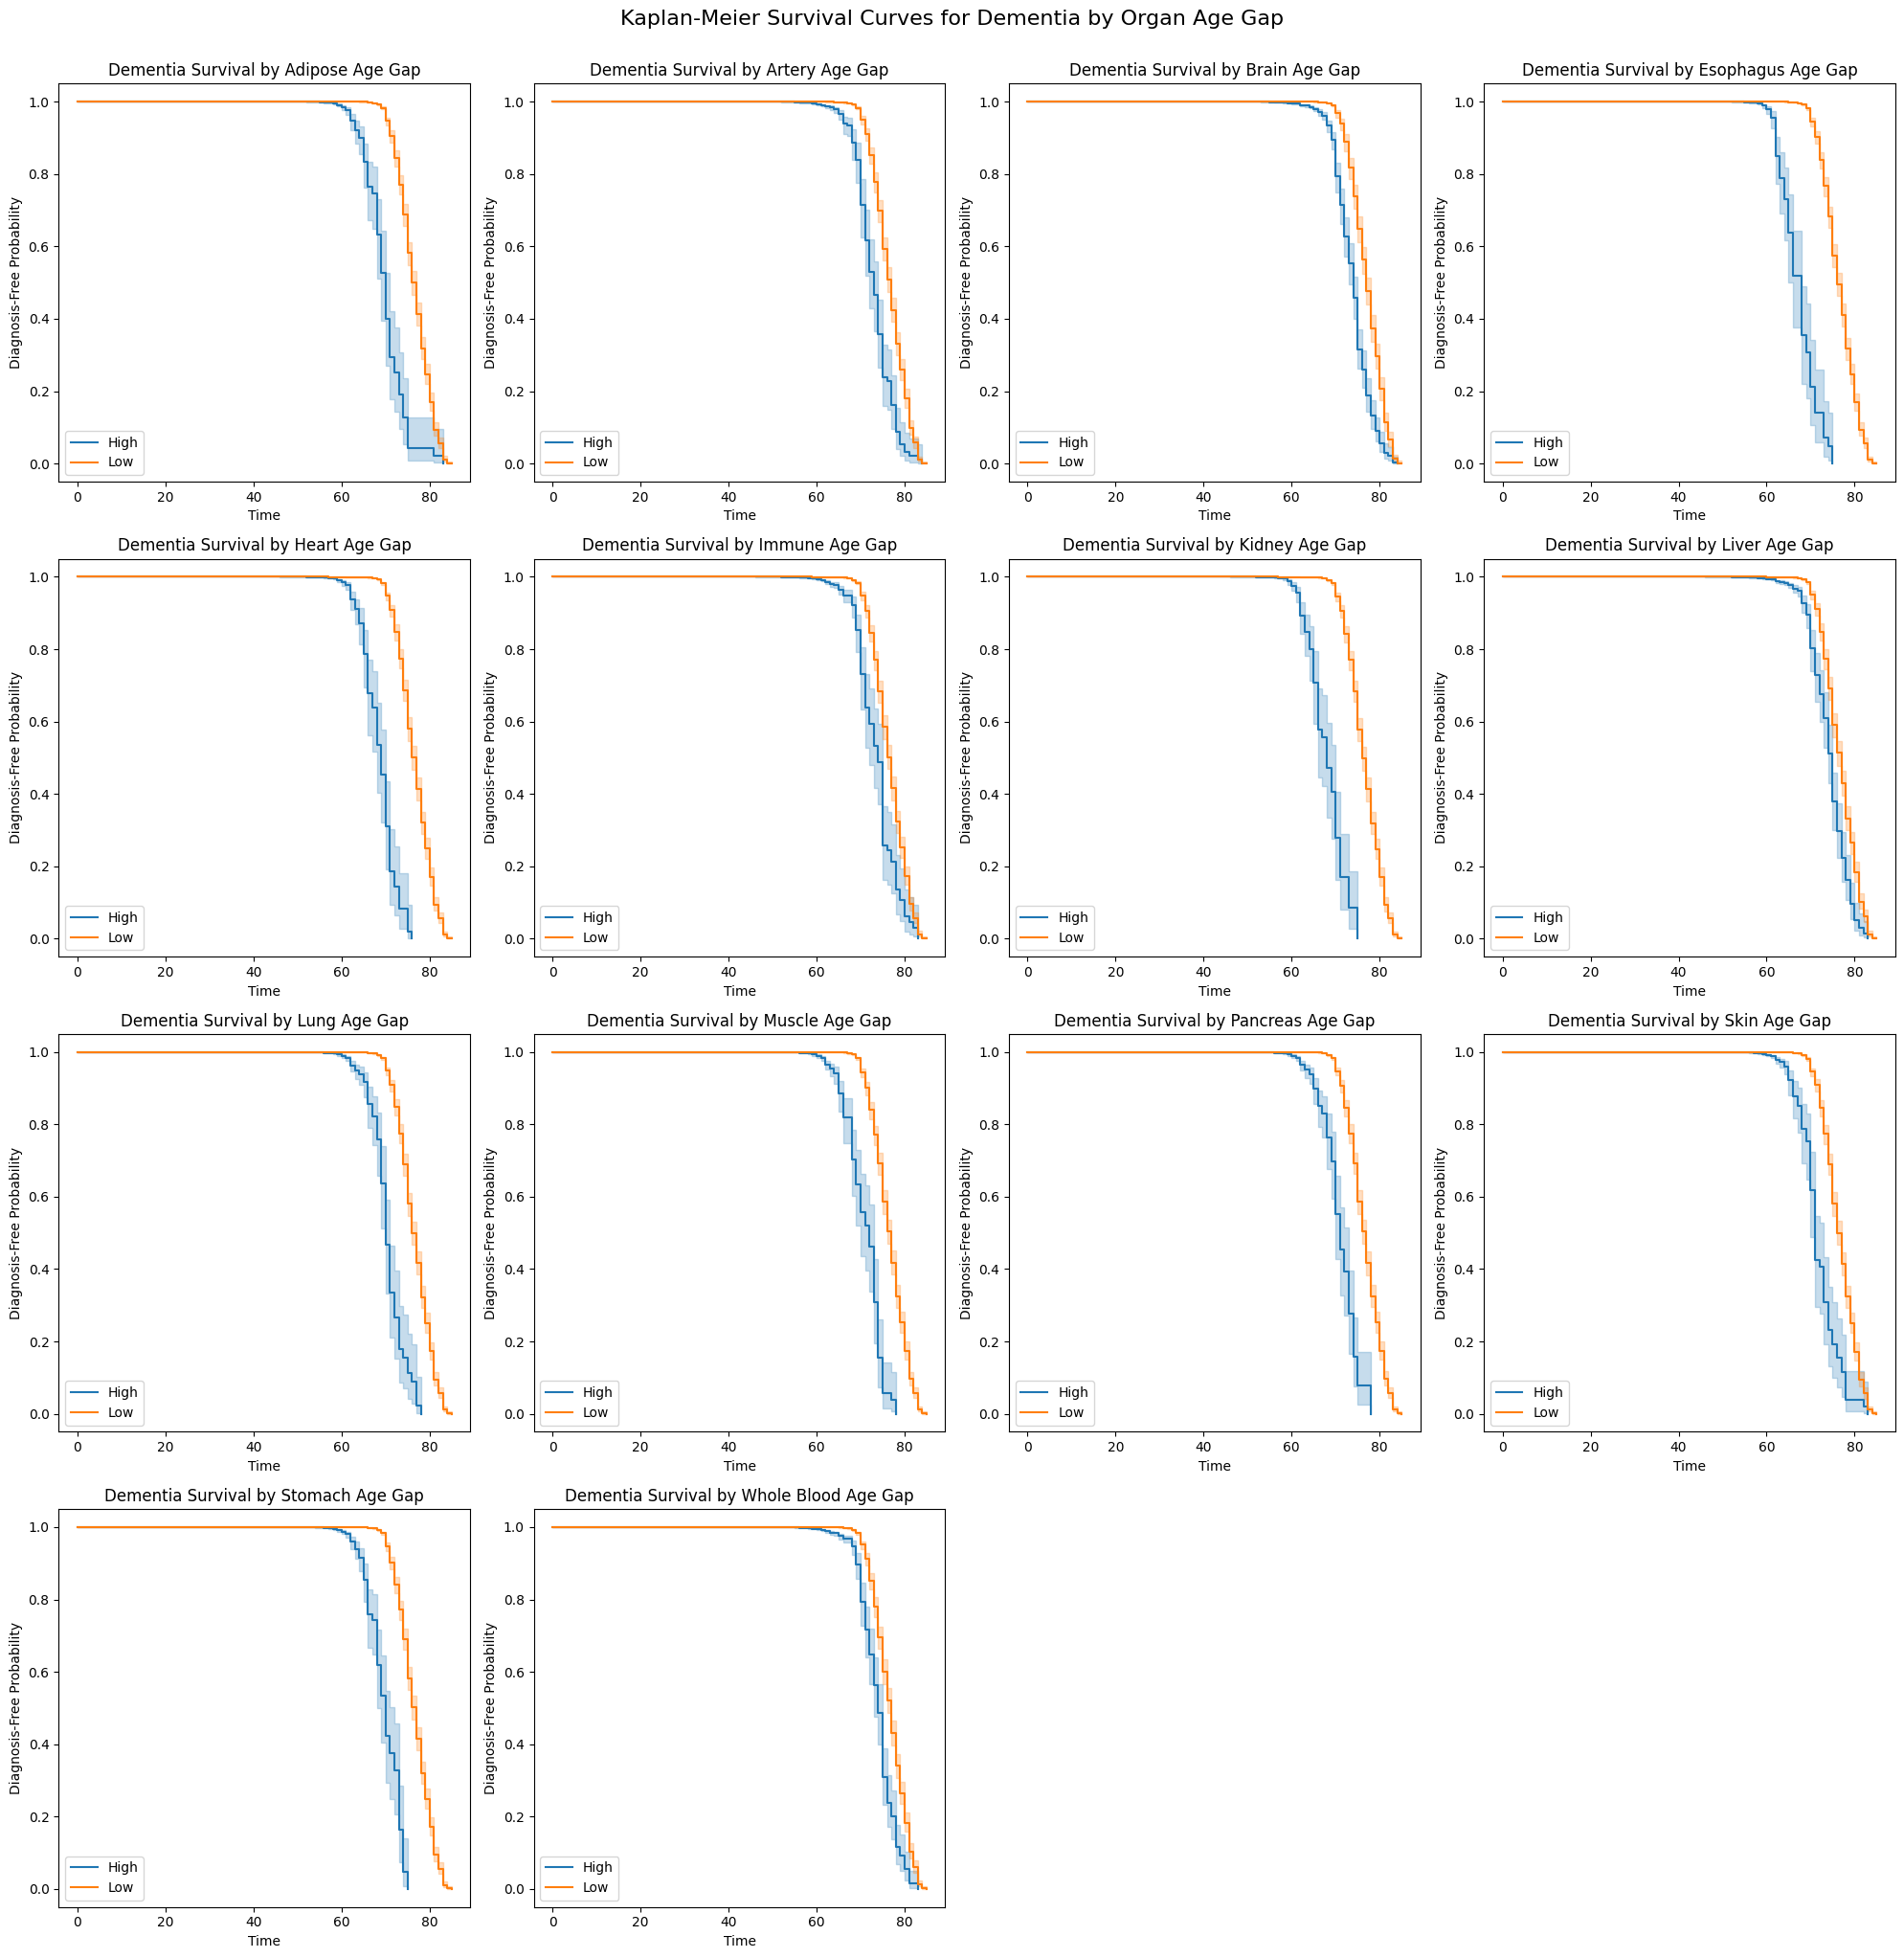

In [59]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_dementia = df_merged[df_merged['disease_group'].isin(['dementia', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_dementia[organ].median()
    df_dementia['organ_group'] = df_dementia[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_dementia['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_dementia[mask]['event_time'], df_dementia[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'Dementia Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for Dementia by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("Dementia_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

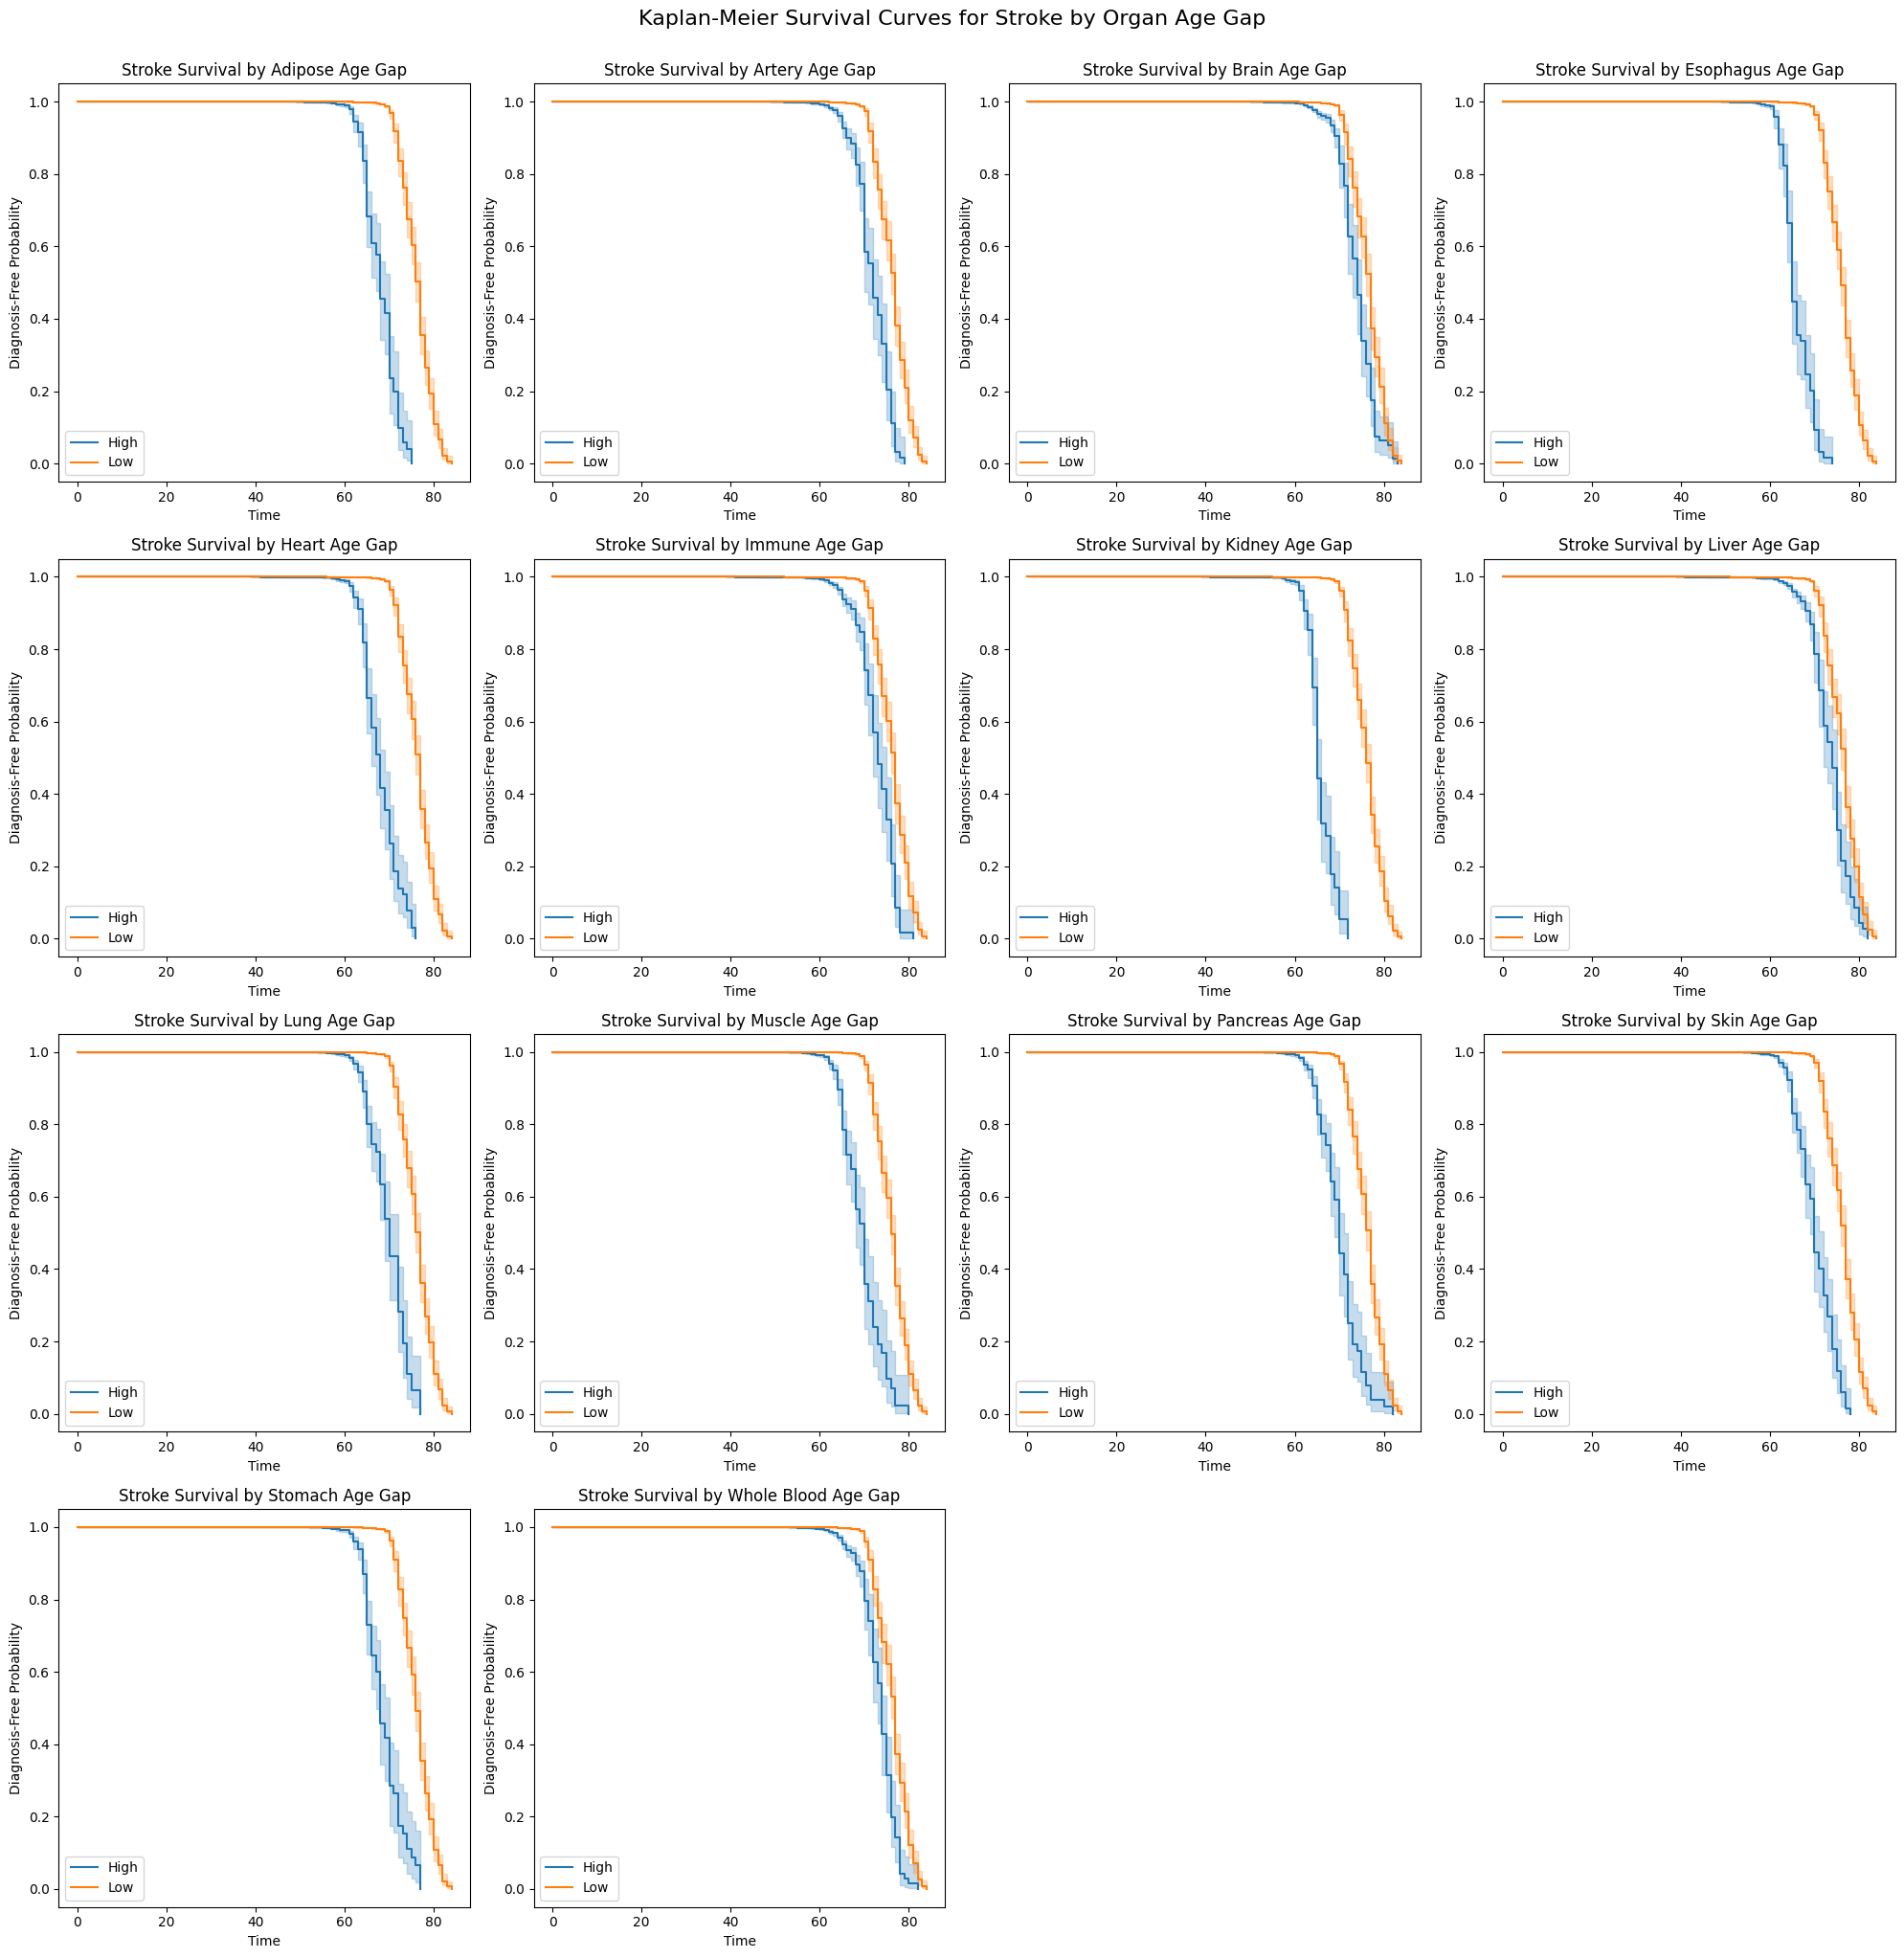

In [60]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_stroke = df_merged[df_merged['disease_group'].isin(['stroke', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_stroke[organ].median()
    df_stroke['organ_group'] = df_stroke[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_stroke['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_stroke[mask]['event_time'], df_stroke[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'Stroke Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for Stroke by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("Stroke_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

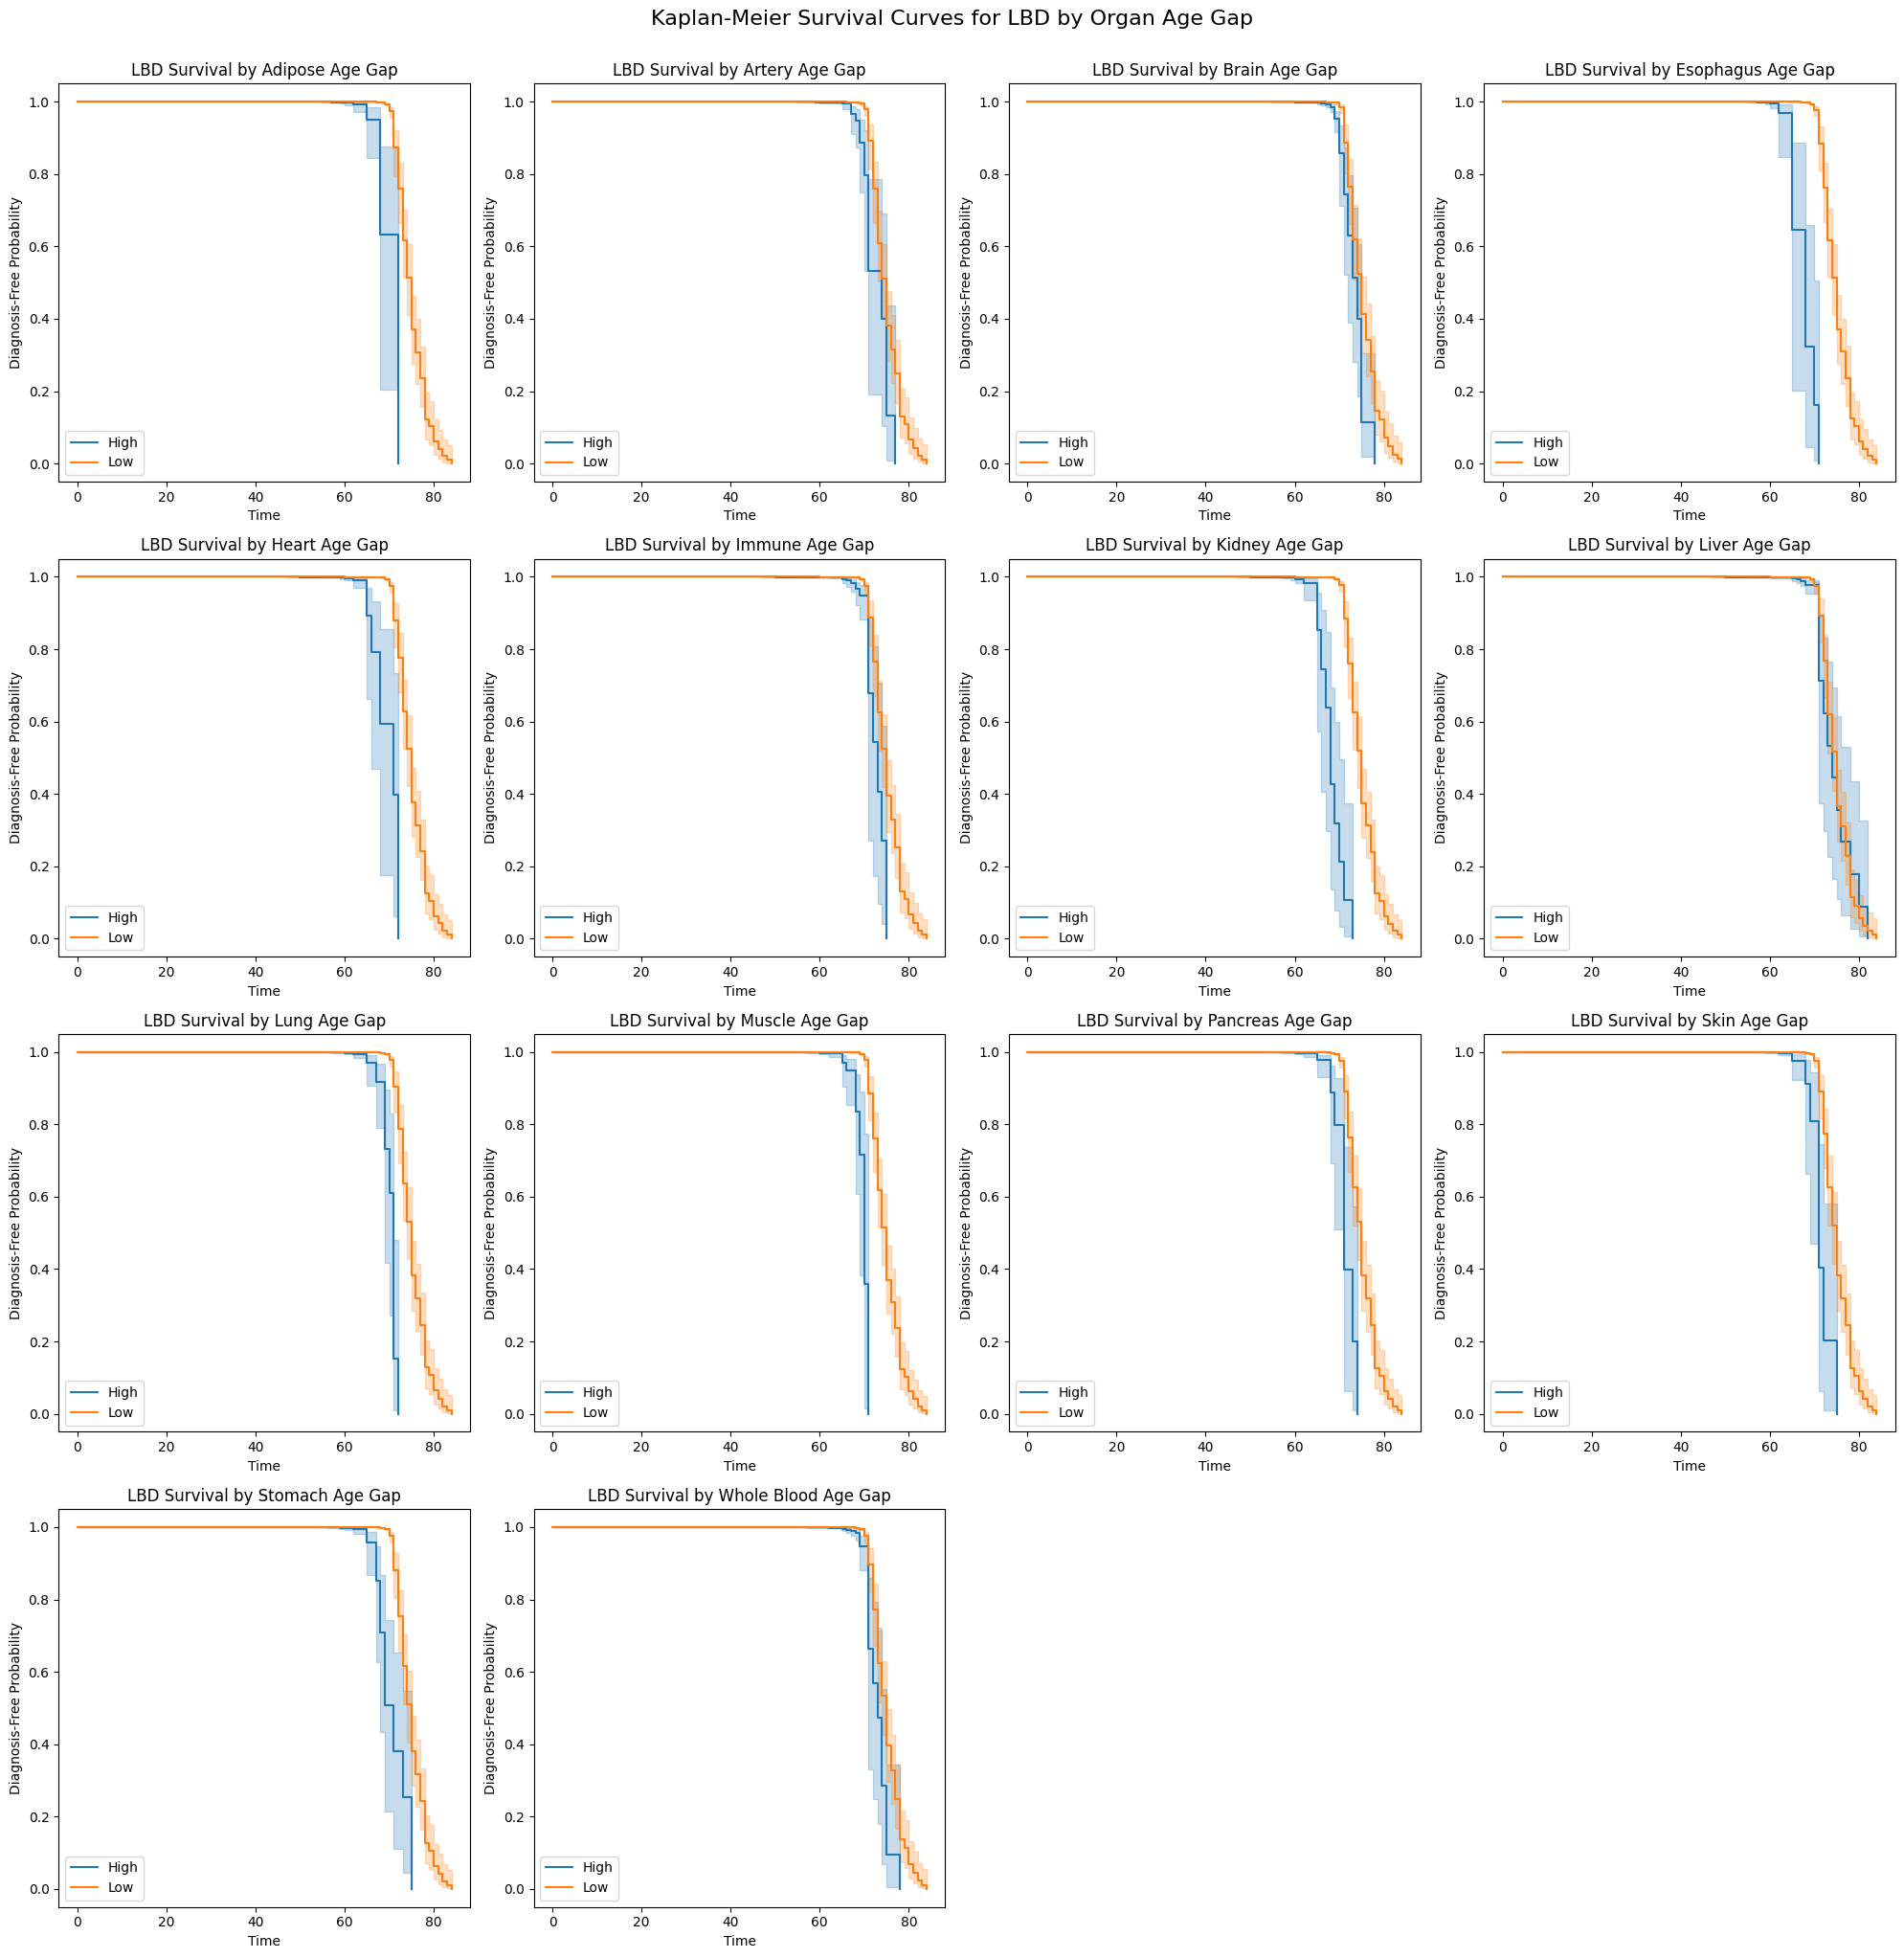

In [61]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_LBD = df_merged[df_merged['disease_group'].isin(['lbd', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_LBD[organ].median()
    df_LBD['organ_group'] = df_LBD[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_LBD['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_LBD[mask]['event_time'], df_LBD[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'LBD Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for LBD by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("LBD_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

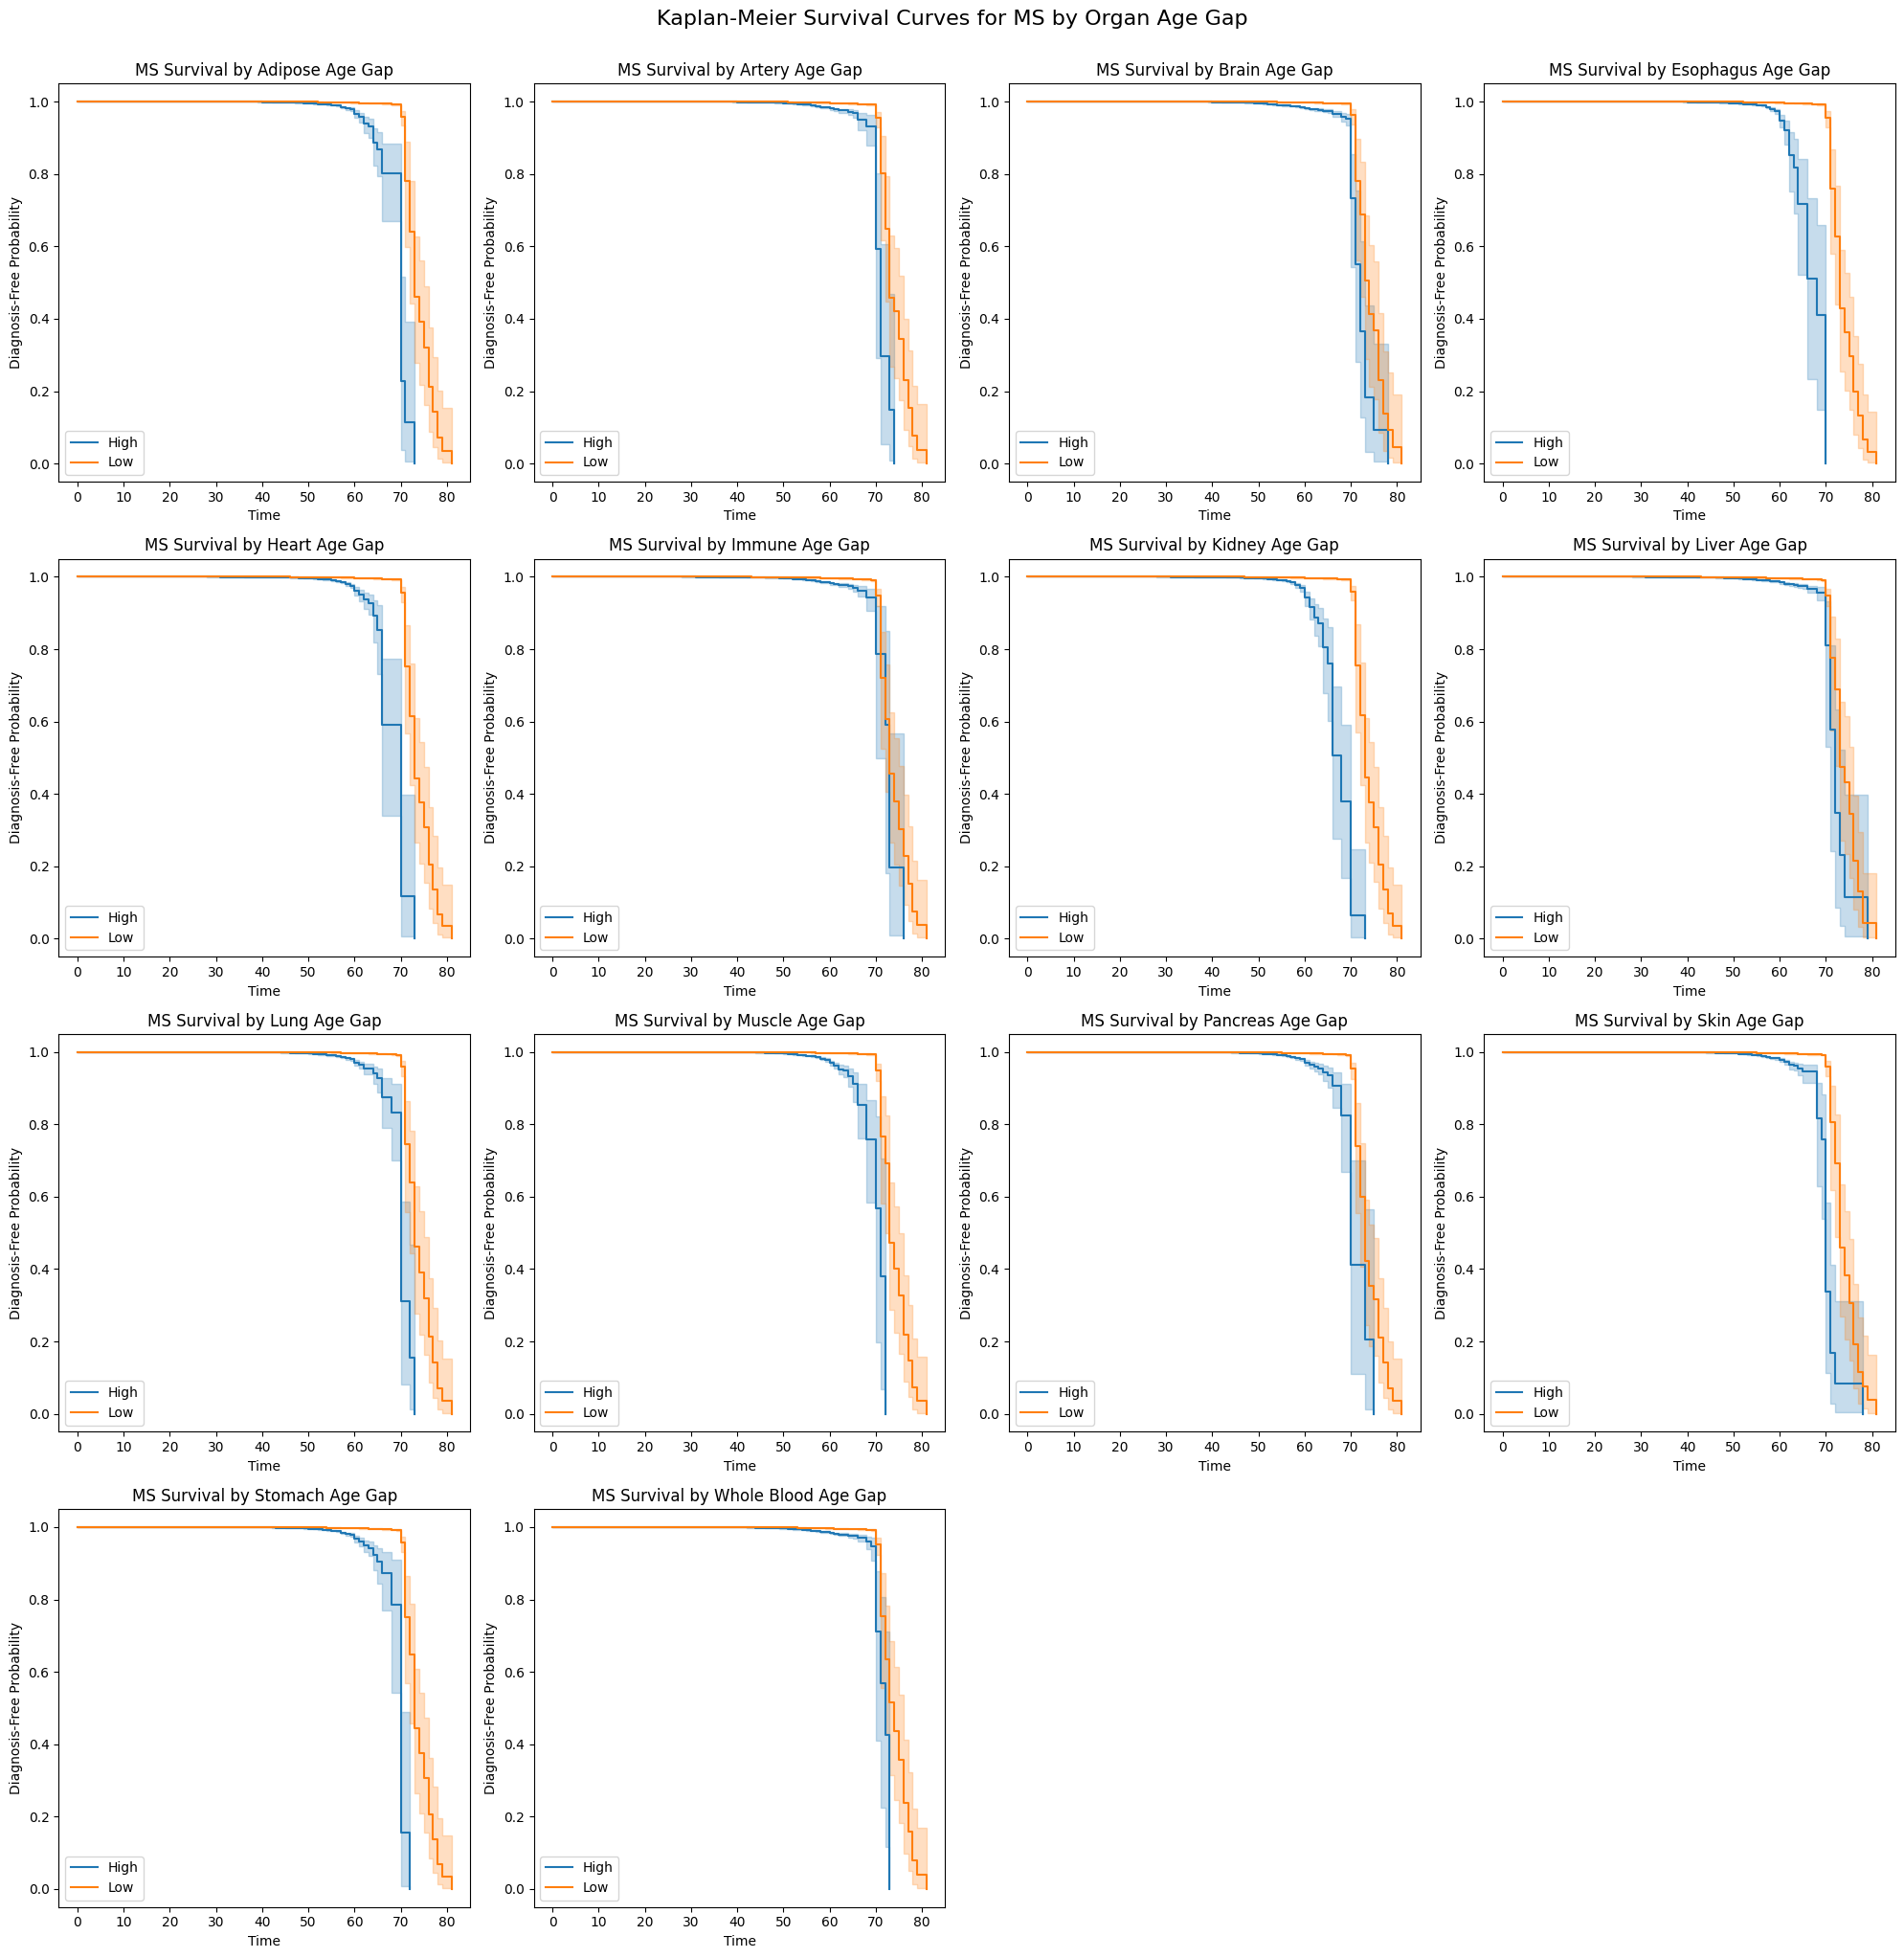

In [62]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_MS = df_merged[df_merged['disease_group'].isin(['ms', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_MS[organ].median()
    df_MS['organ_group'] = df_MS[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_MS['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_MS[mask]['event_time'], df_MS[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'MS Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for MS by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("MS_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

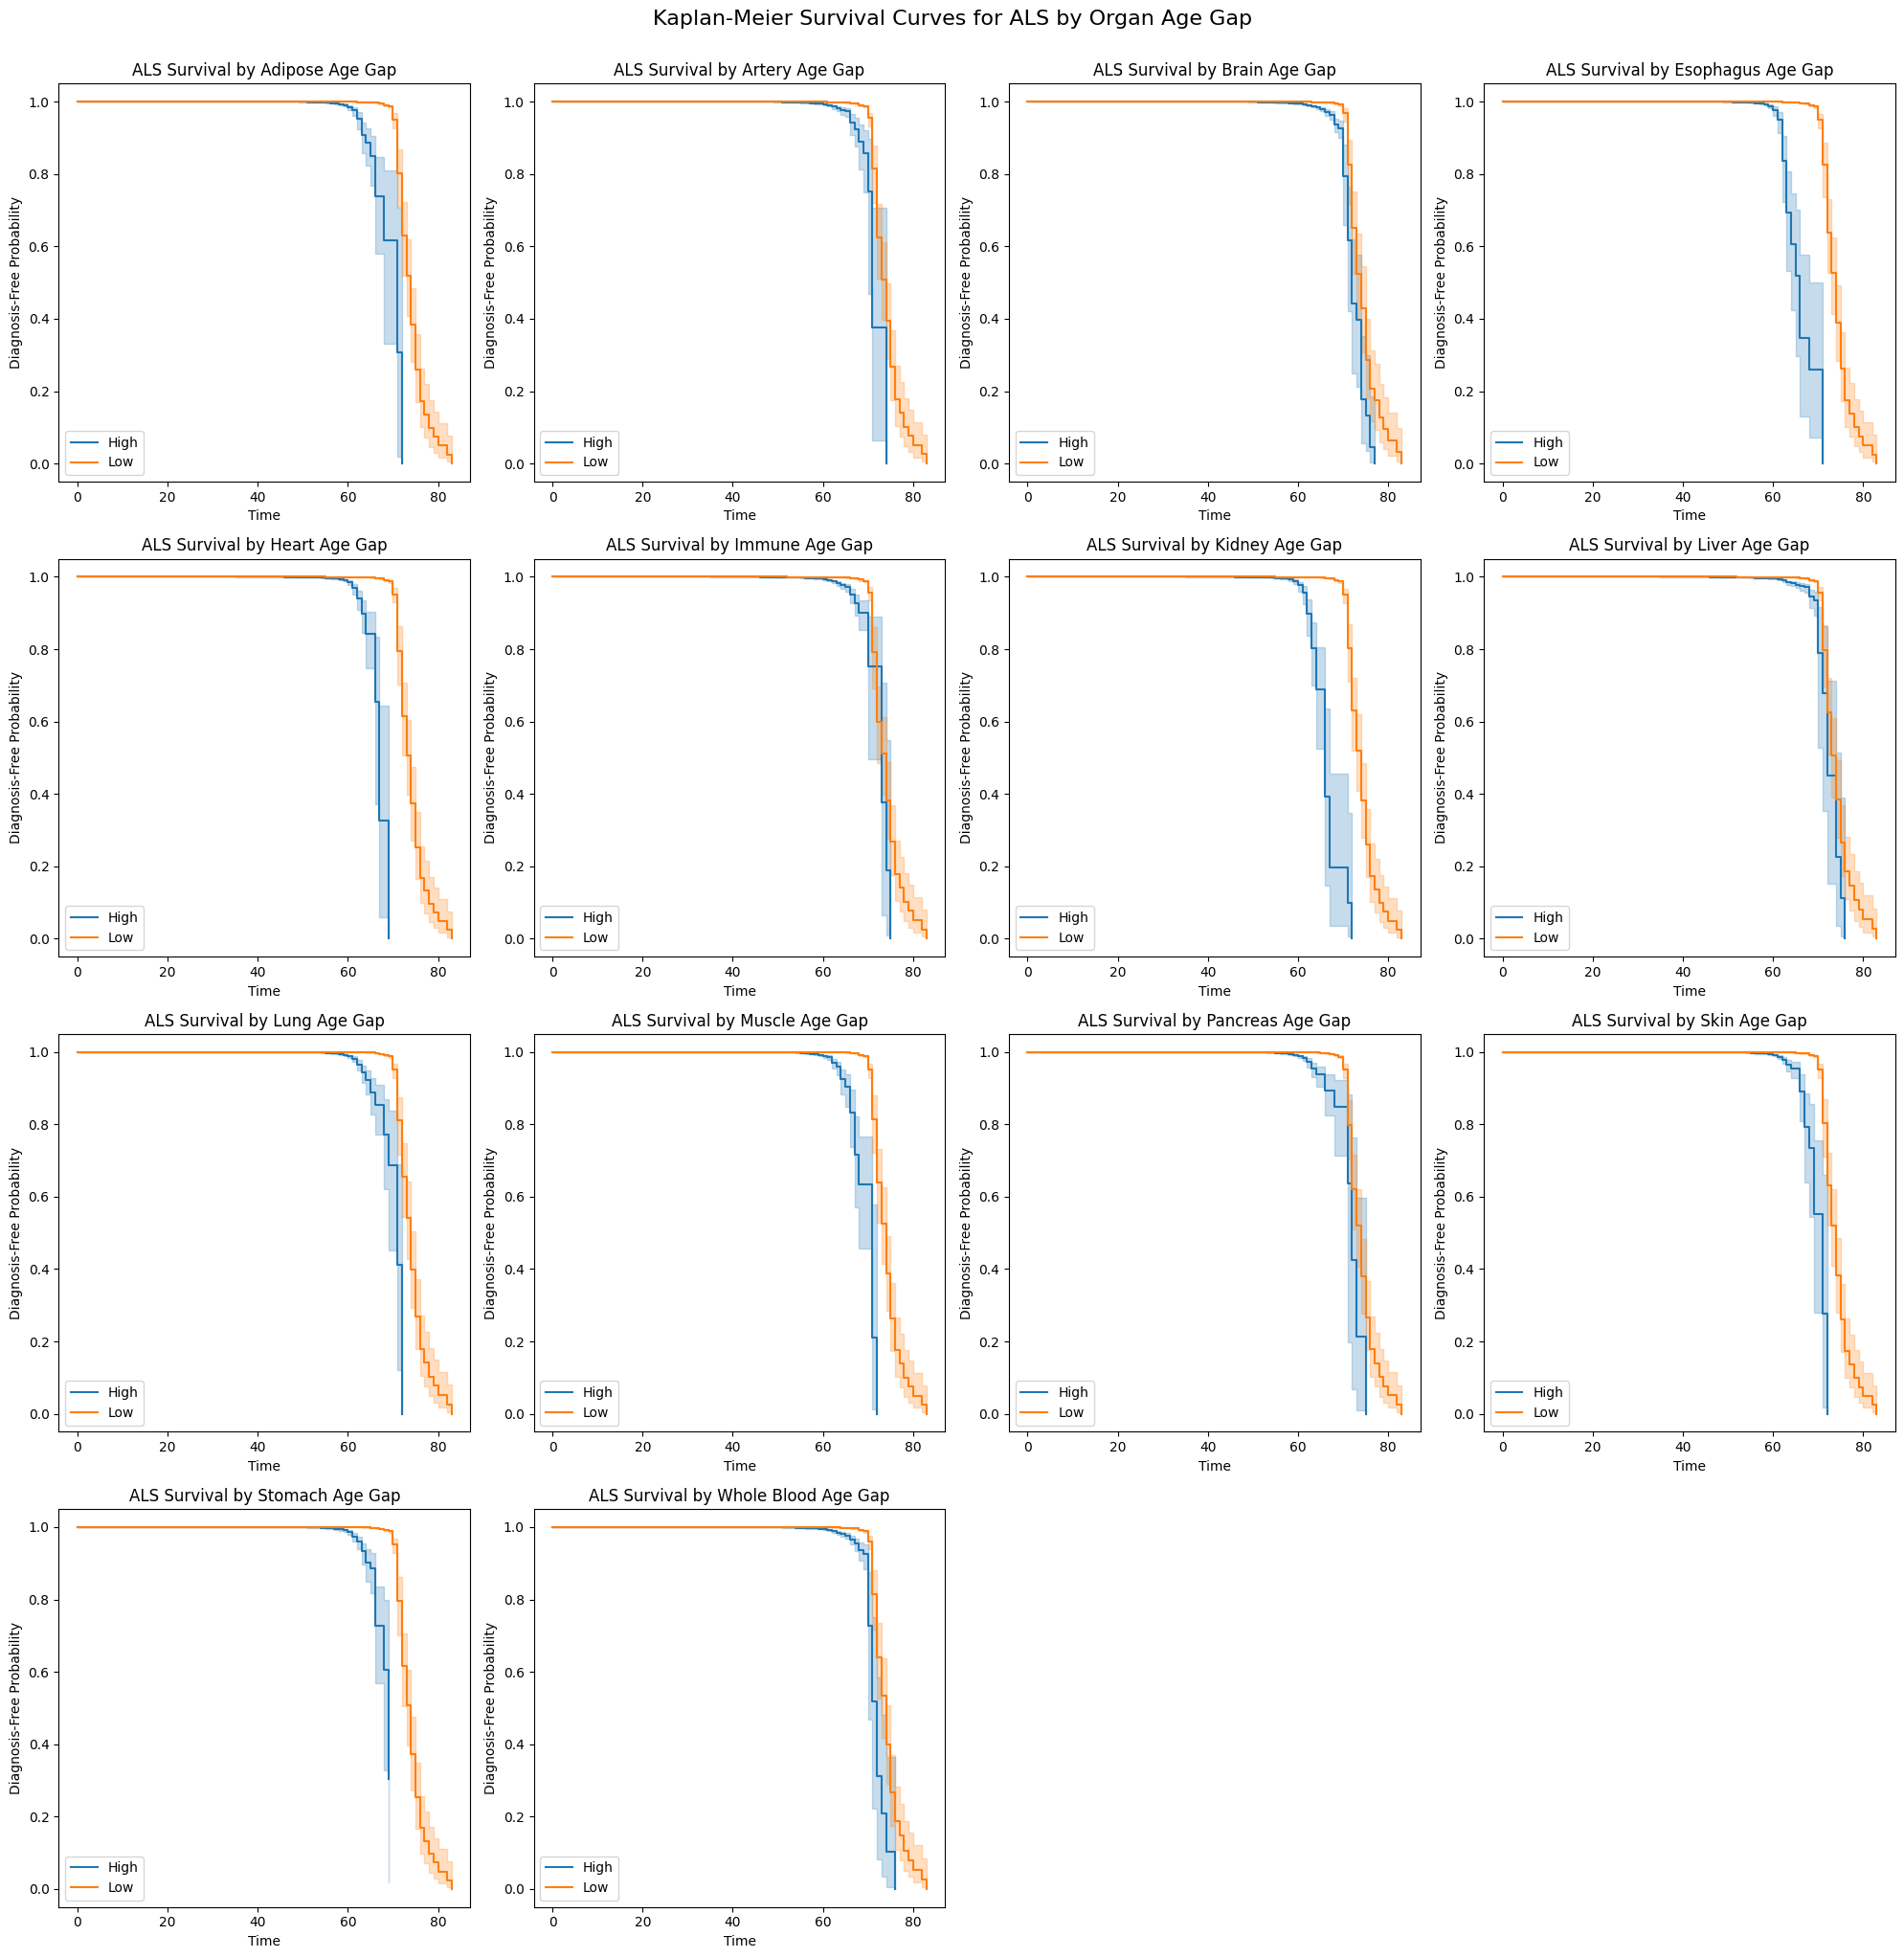

In [63]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_ALS = df_merged[df_merged['disease_group'].isin(['als', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_ALS[organ].median()
    df_ALS['organ_group'] = df_ALS[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_ALS['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_ALS[mask]['event_time'], df_ALS[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'ALS Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for ALS by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("ALS_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

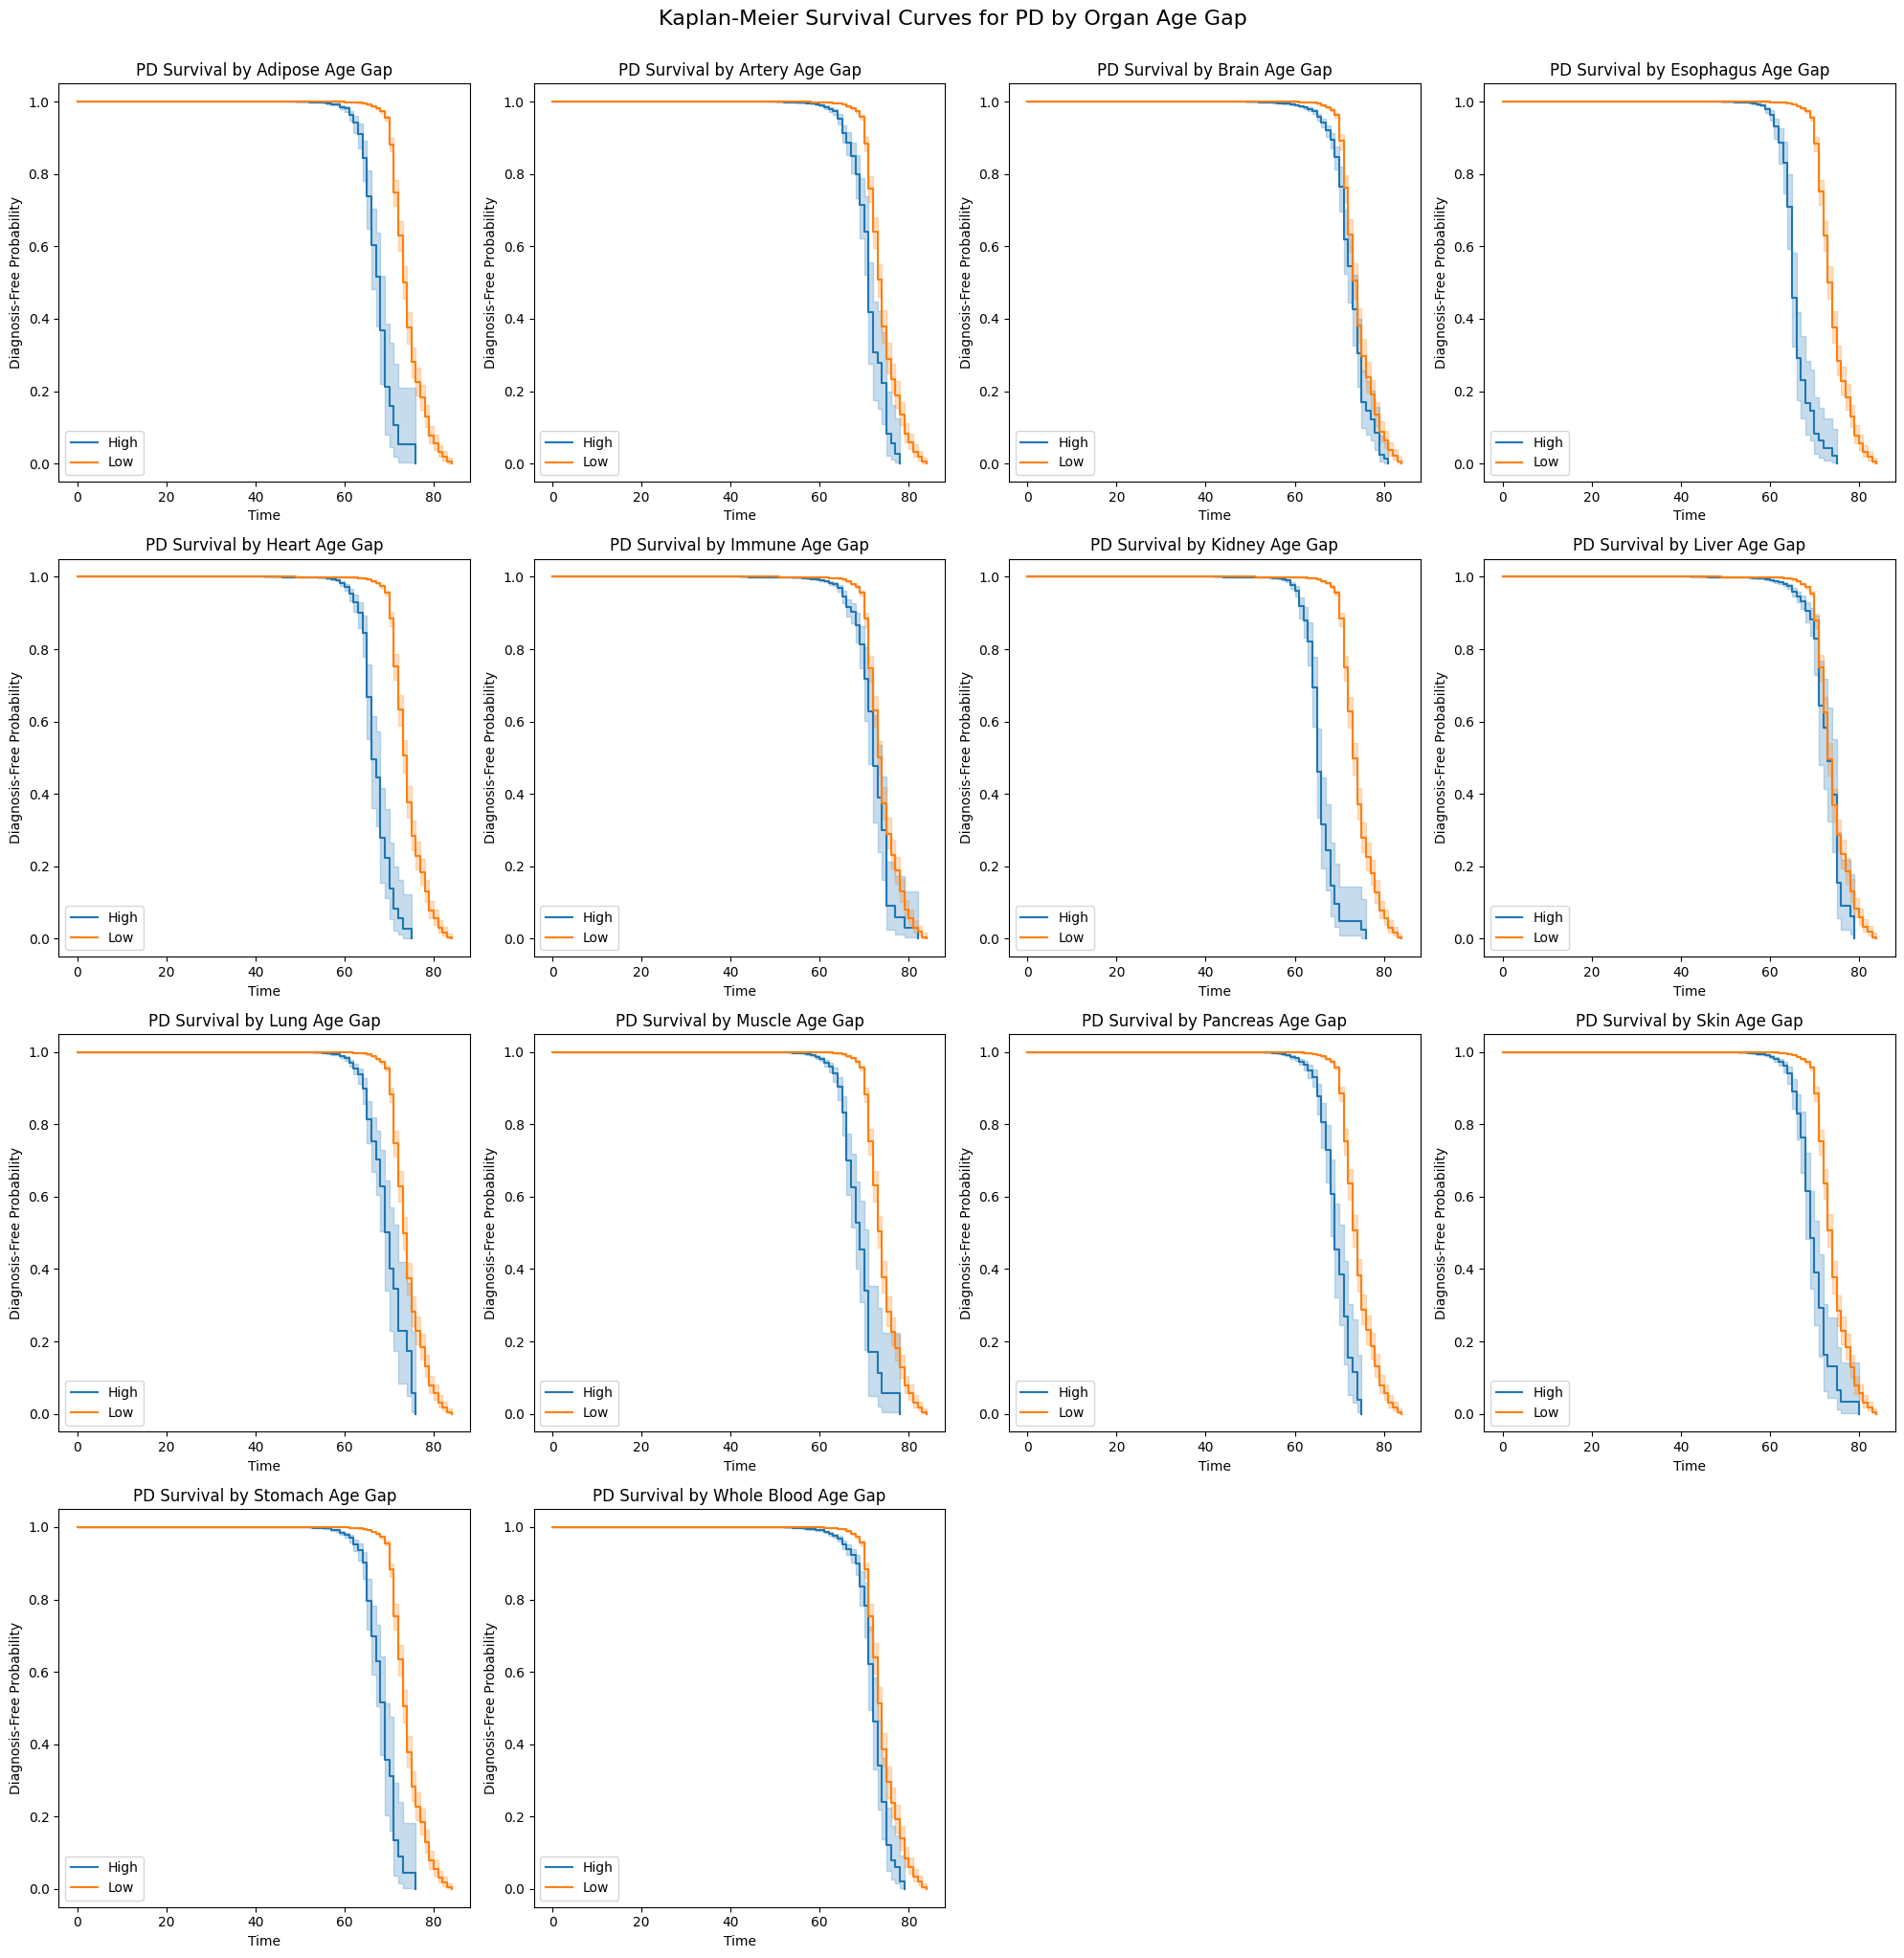

In [64]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_PD = df_merged[df_merged['disease_group'].isin(['parkinson', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_PD[organ].median()
    df_PD['organ_group'] = df_PD[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_PD['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_PD[mask]['event_time'], df_PD[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'PD Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for PD by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("PD_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

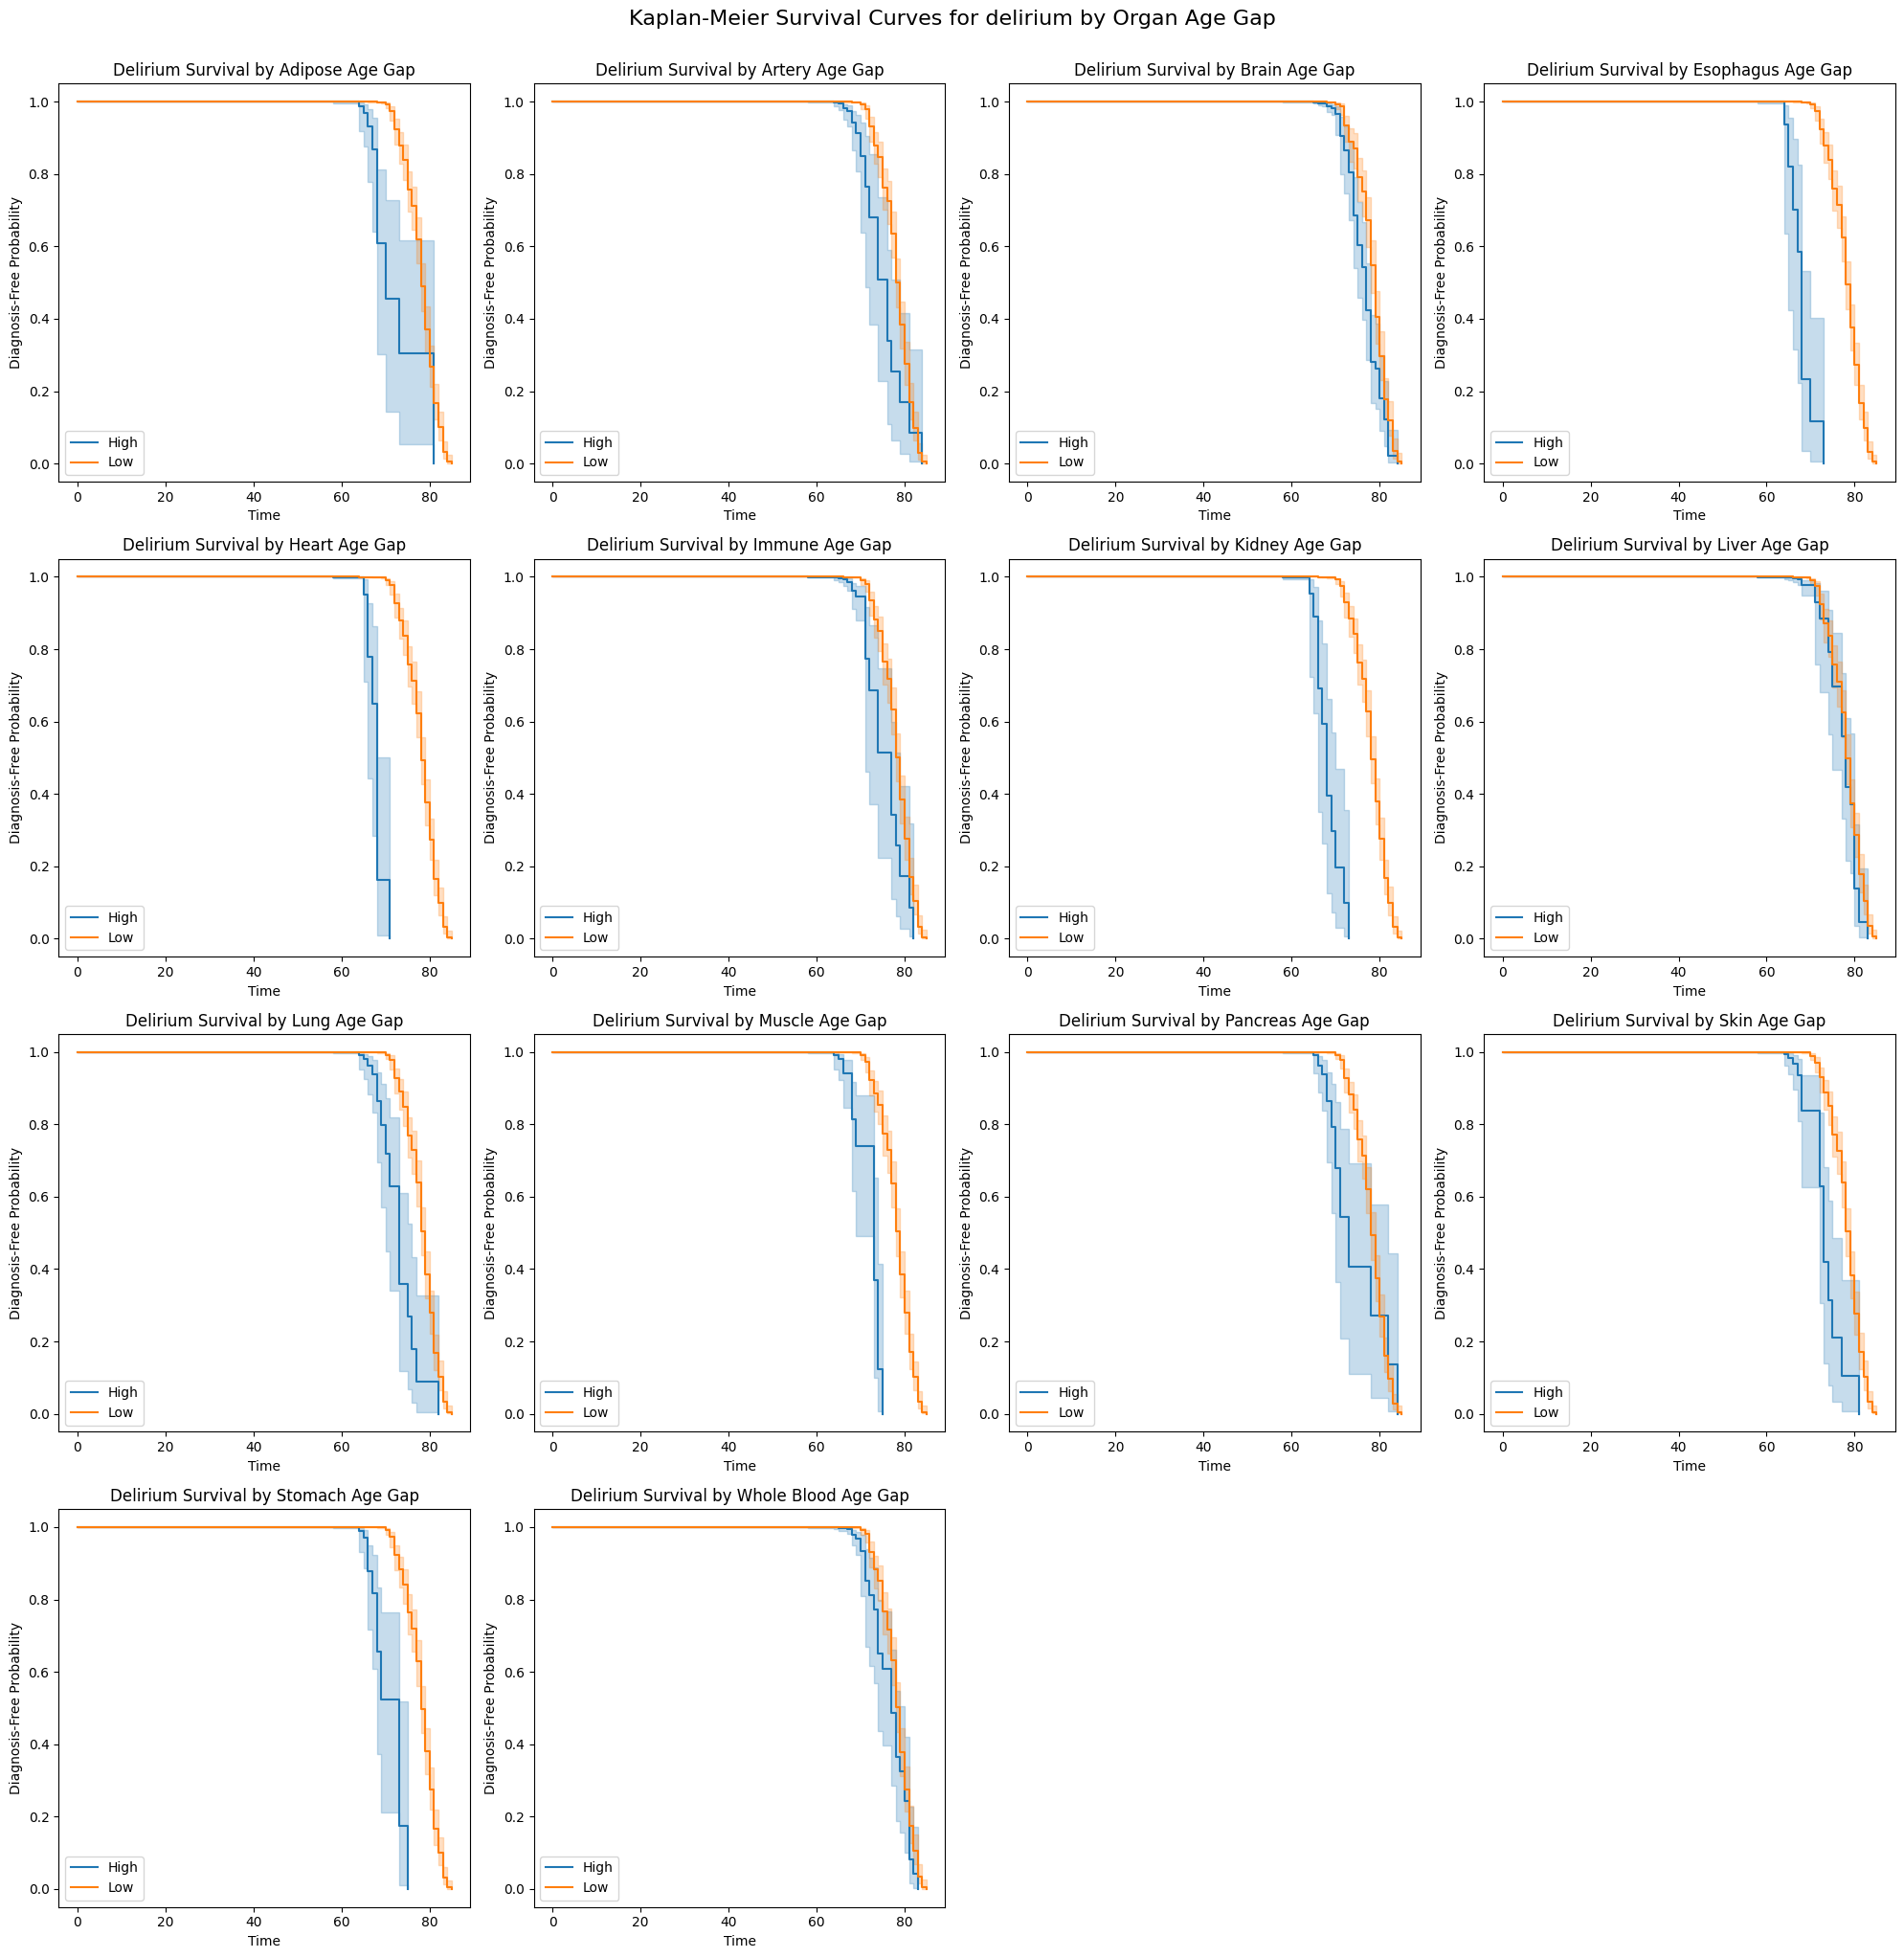

In [65]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_Delirium = df_merged[df_merged['disease_group'].isin(['delirium', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_Delirium[organ].median()
    df_Delirium['organ_group'] = df_Delirium[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_Delirium['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_Delirium[mask]['event_time'], df_Delirium[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'Delirium Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for delirium by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("Delirium_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

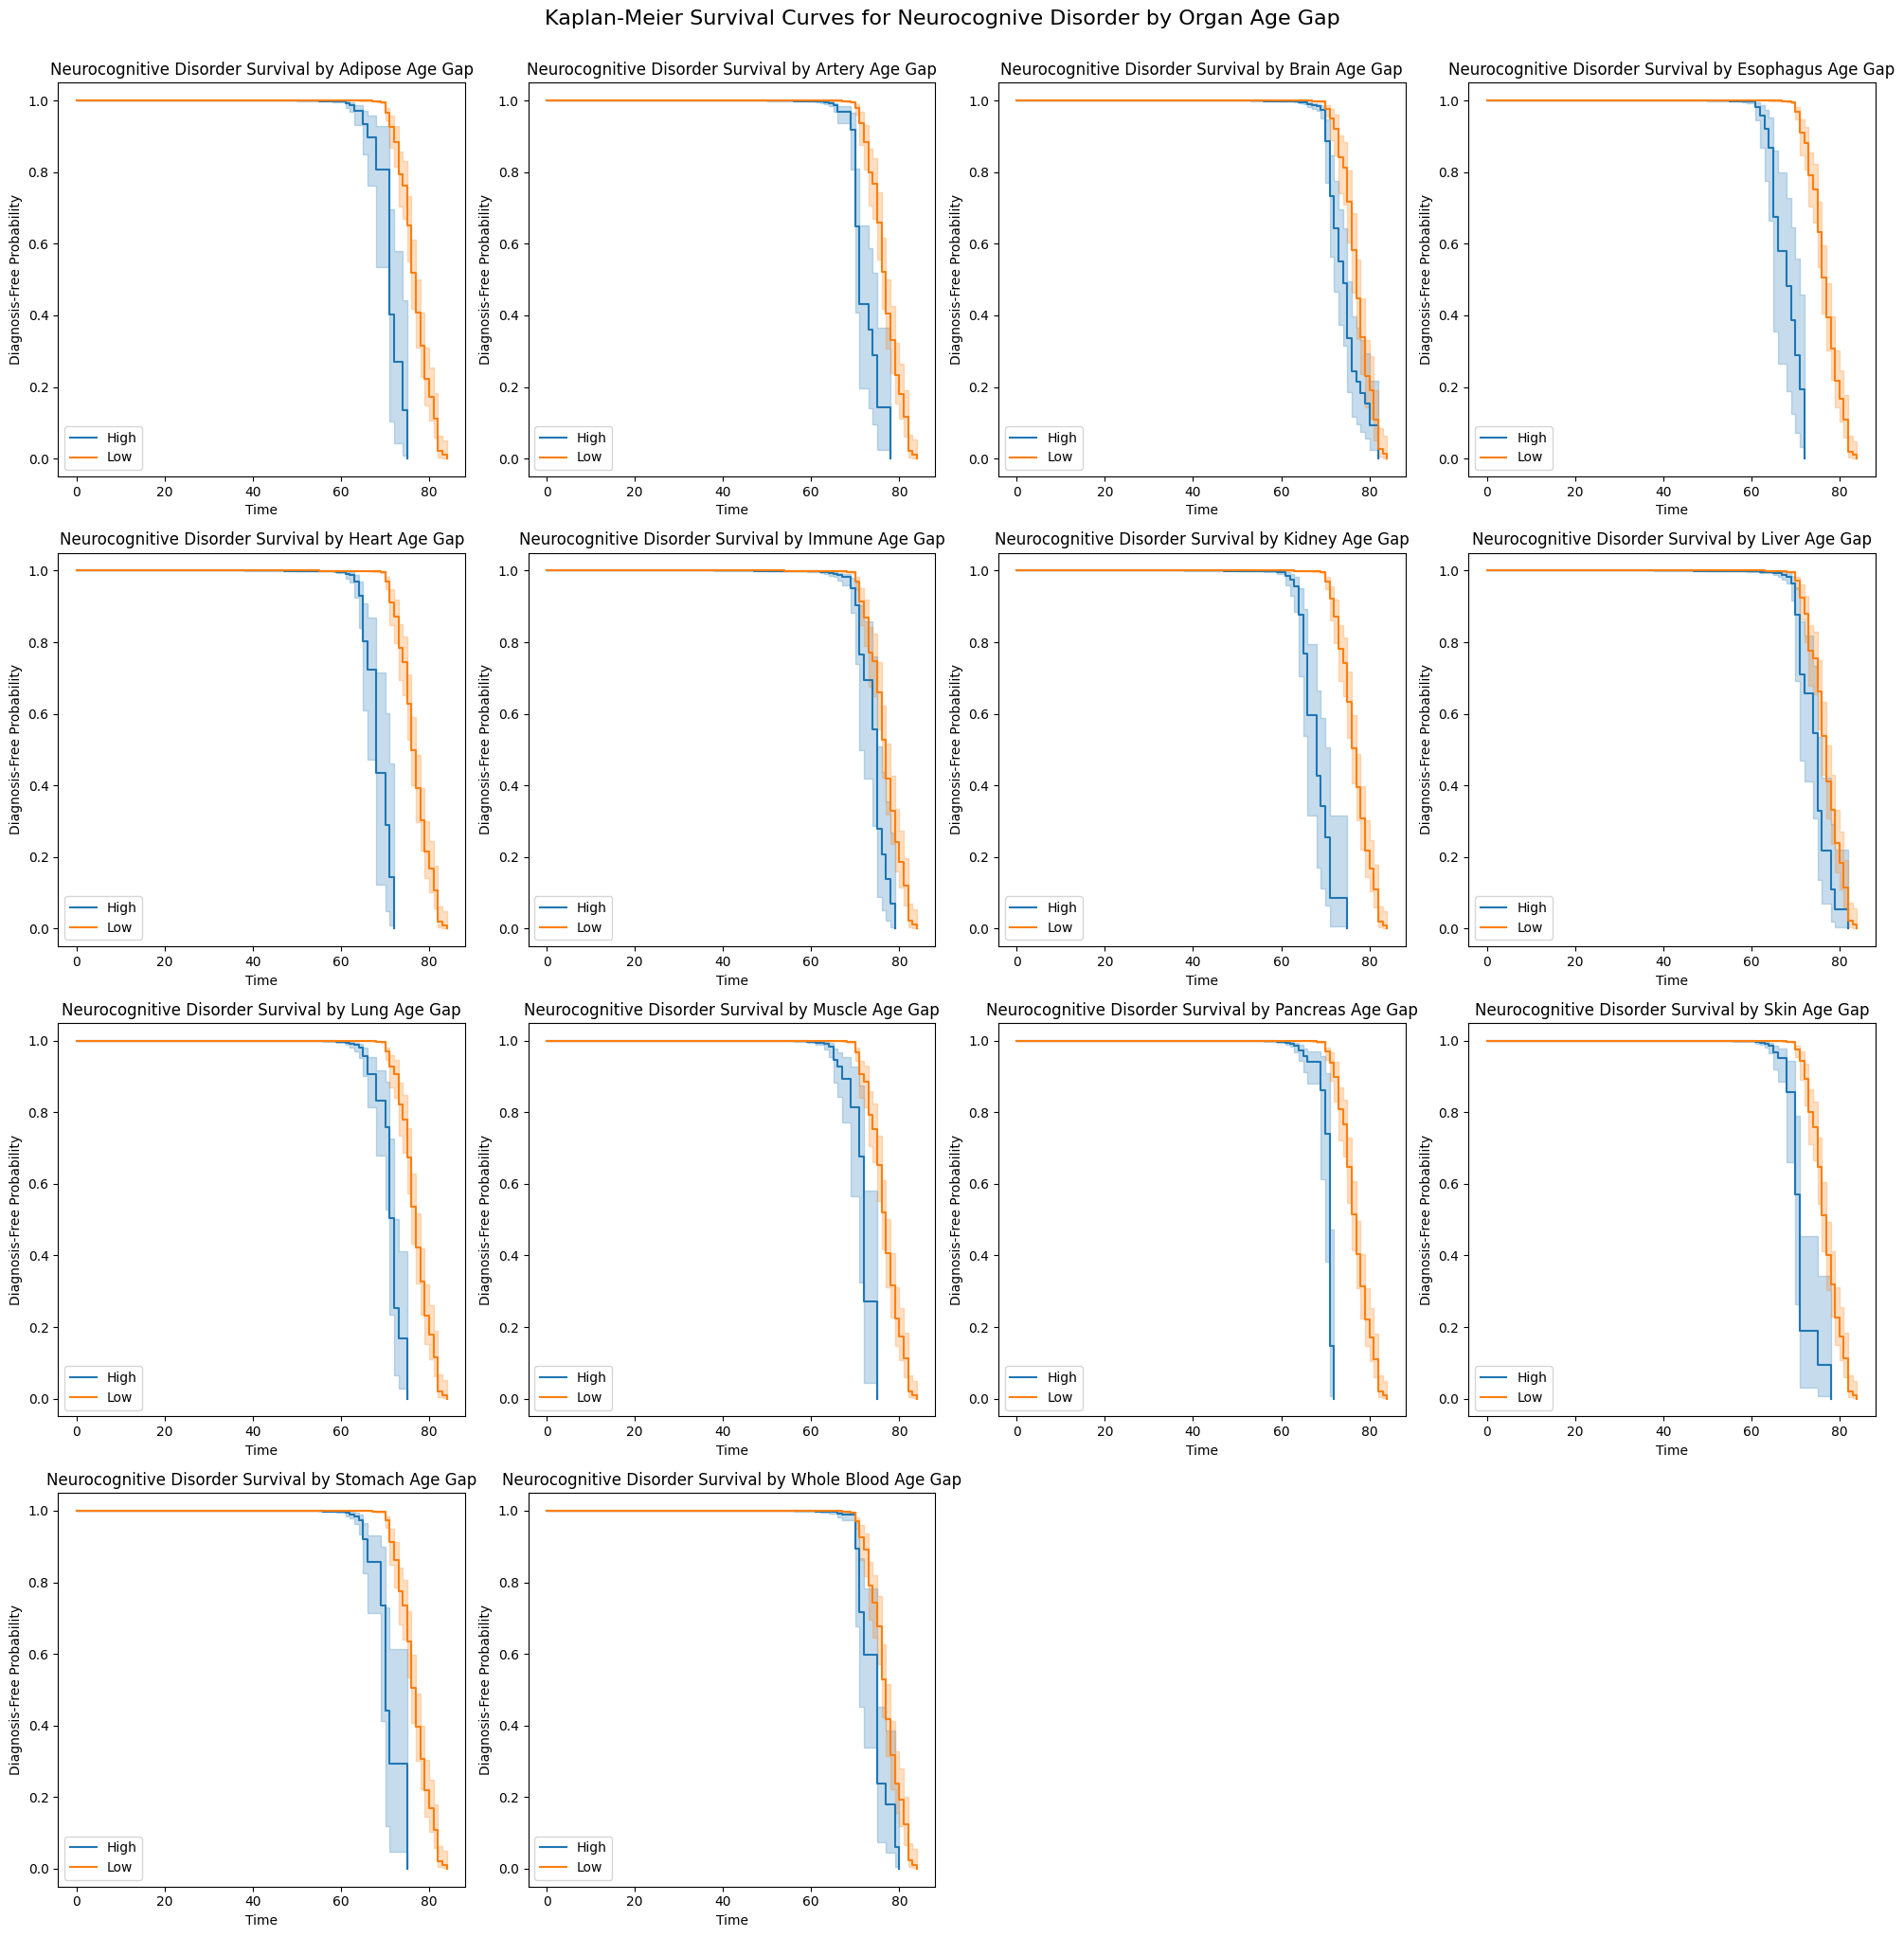

In [66]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_NC = df_merged[df_merged['disease_group'].isin(['neurocognitive_disorder', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_NC[organ].median()
    df_NC['organ_group'] = df_NC[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_NC['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_NC[mask]['event_time'], df_NC[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'Neurocognitive Disorder Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for Neurocognive Disorder by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("Neurocognitive_disorder_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()

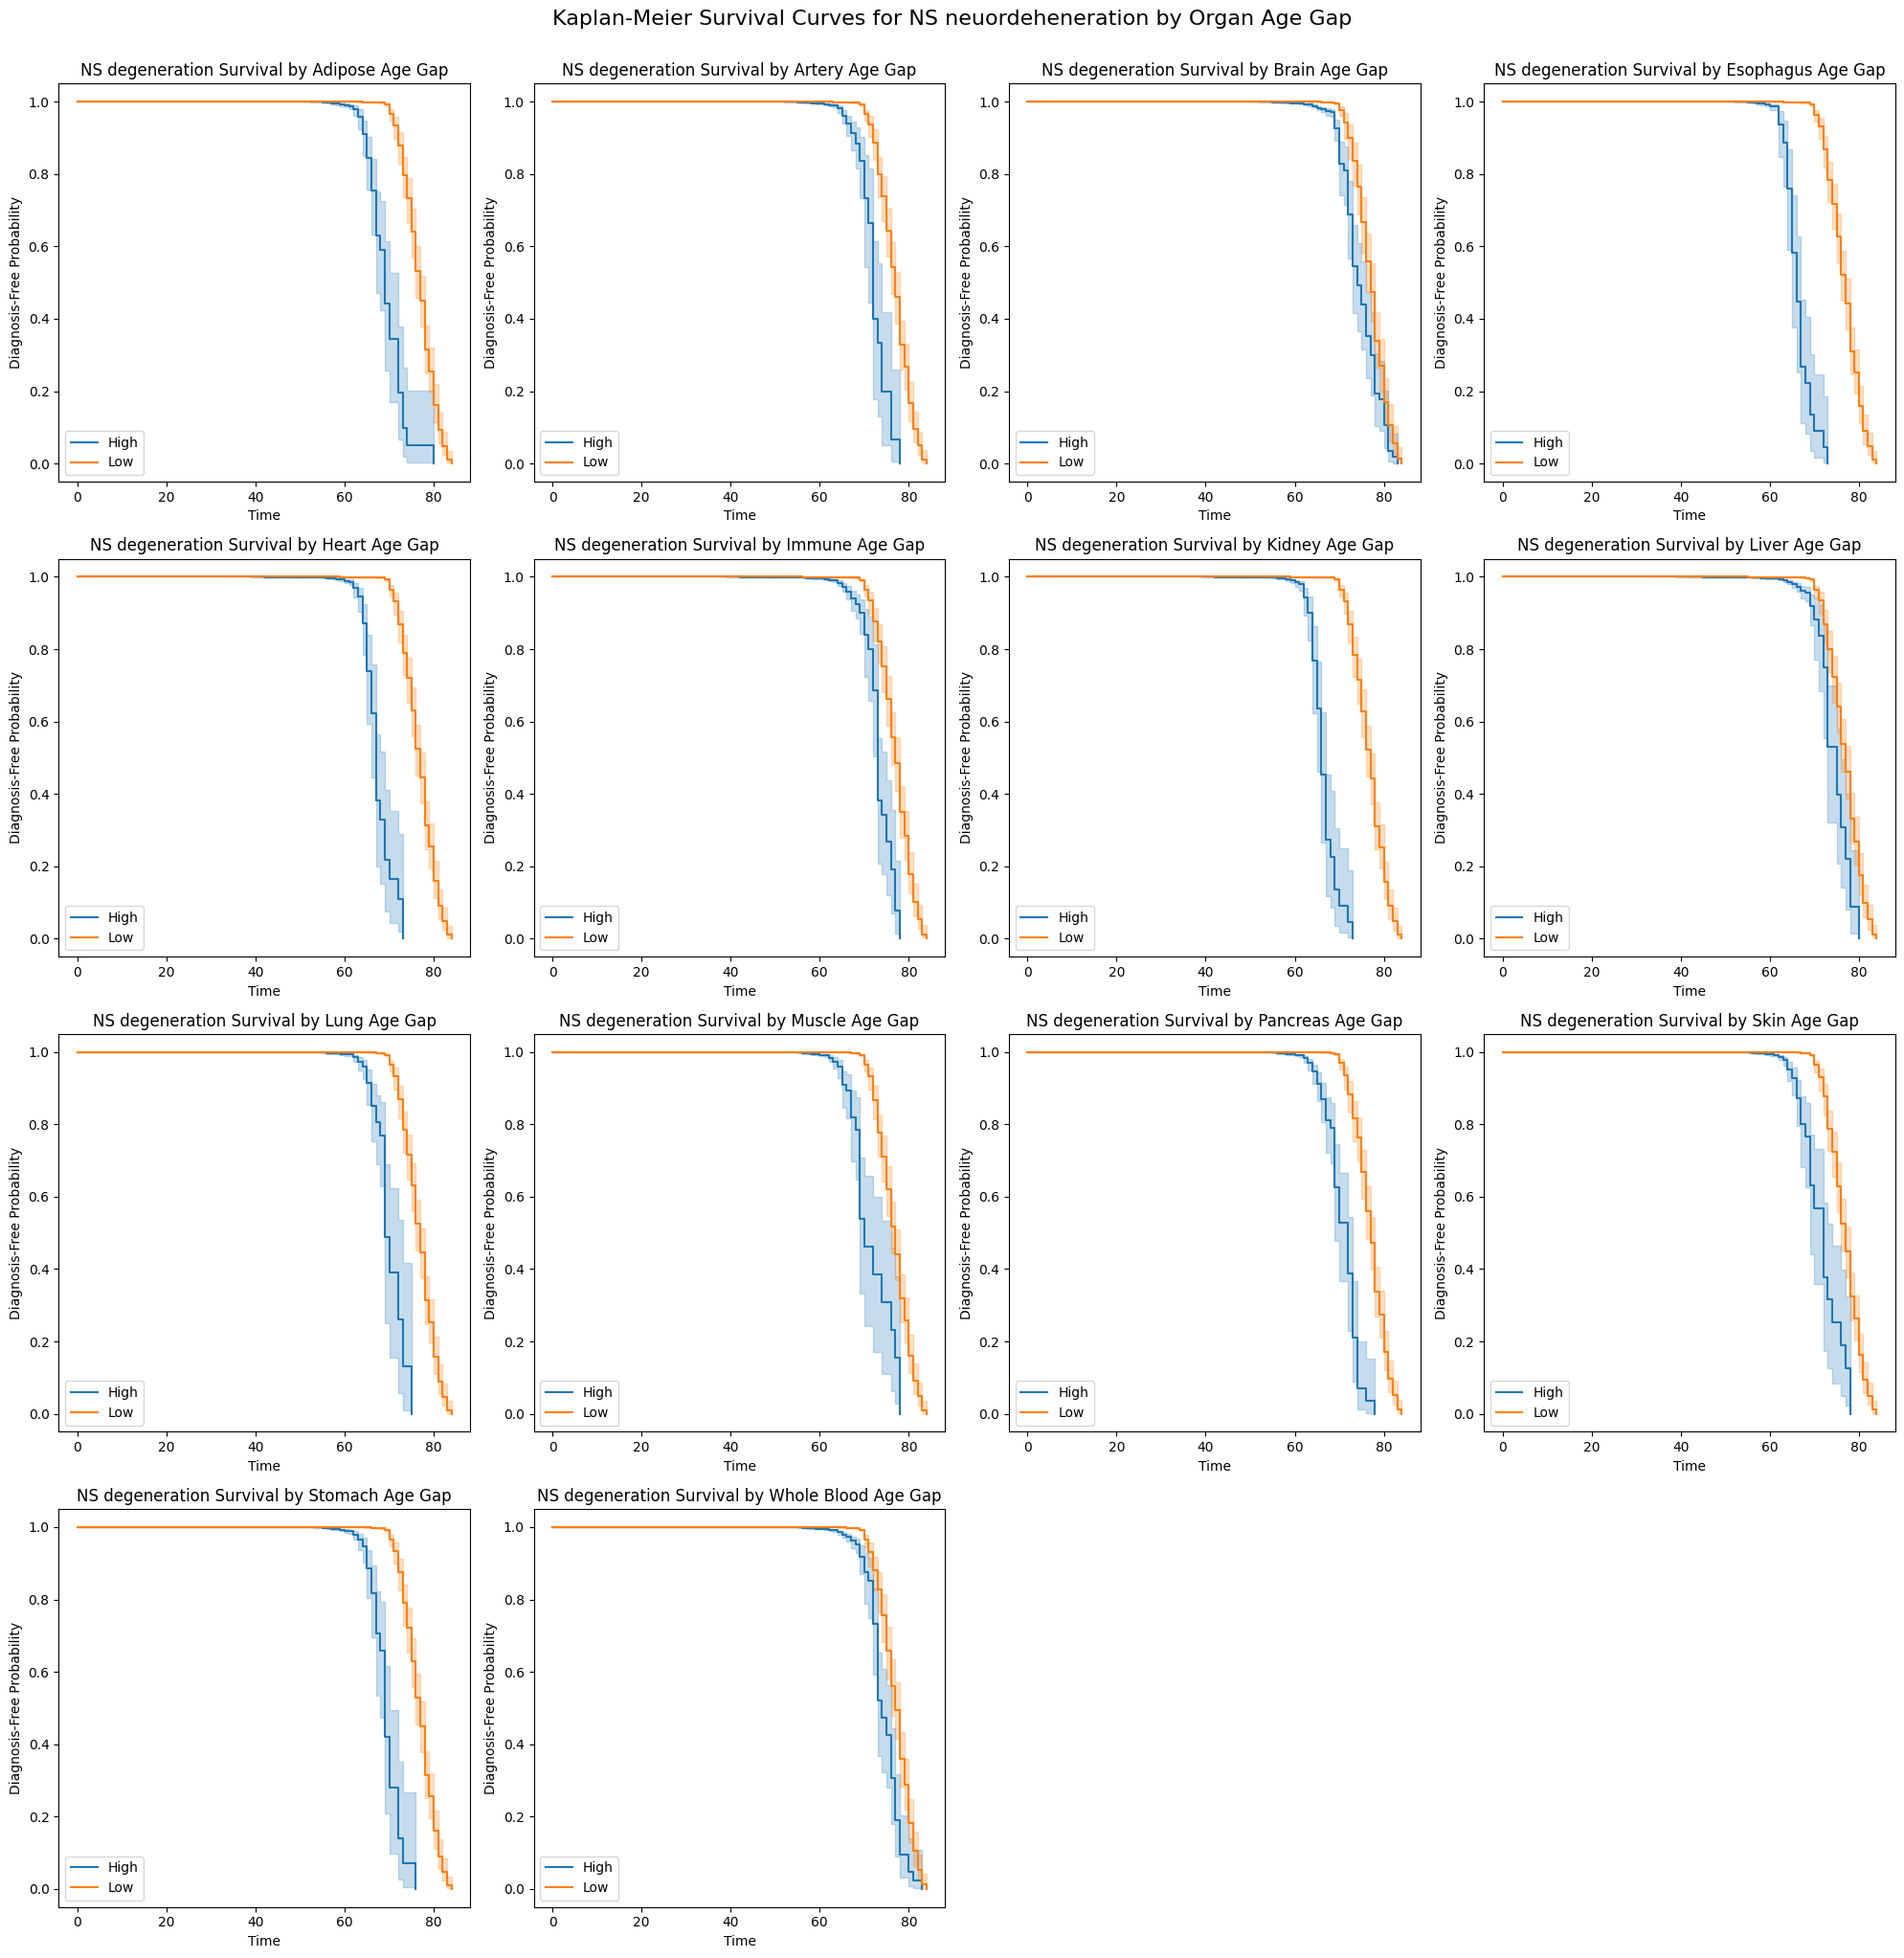

In [68]:
# Filter to only Alzheimer's cases + controls (event_observed = 0 or 1)
df_NS = df_merged[df_merged['disease_group'].isin(['ns_degeneration', 'none'])].copy()
num_organs = len(organ_cols)
cols = 4
rows = (num_organs + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

# Plot KM curves for each organ
for i, organ in enumerate(organ_cols):
    ax = axes[i]
    # Split into high and low based on median
    median_gap = df_NS[organ].median()
    df_NS['organ_group'] = df_NS[organ].apply(lambda x: 'High' if x >= median_gap else 'Low')

    for group in ['High', 'Low']:
        mask = df_NS['organ_group'] == group
        kmf = KaplanMeierFitter()
        kmf.fit(df_NS[mask]['event_time'], df_NS[mask]['event_observed'], label=group)
        kmf.plot(ax=ax)

    ax.set_title(f'NS degeneration Survival by {organ} Age Gap')
    ax.set_xlabel('Time')
    ax.set_ylabel('Diagnosis-Free Probability')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Kaplan-Meier Survival Curves for NS neuordeheneration by Organ Age Gap', fontsize=16, y=1.02)
plt.savefig("NS neurodegeneration_disorder_kaplan_meier_by_organ.png", dpi=300, bbox_inches='tight')
plt.show()